# Predicting the Intent of Online Shoppers

#### Team Members:
1. Mohammed Abdul Basith- C0891800
2. Mohammed Salman Khan- C0906107
3. Saniya Jabeen- C0894983
4. Tasneem Badar- C0896344

## 1. Introduction: 

Retail shopping is continuing to shift to E-commerce shopping and as a result the dynamics of shopping is changing around the world. E-commerce has already become a major form of retail market. Online customers often browse pages of e-commerce sites before they place orders or abandon their browsing without purchase. This information can help businesses to better cater to customer preferences and help both the business and customers mutually by recommending products specific to each customer and therefore increasing sales for the businesses. However, most of the time customers visiting these online websites may not make any purchase at all. This could be for various reasons i.e., Price of product or window shopping. It is important to predict customers' purchasing intention so that retention measures like e.g., recommending suitable products can be taken to convert potential customers into purchasers.

The dataset is taken from UCI repository.





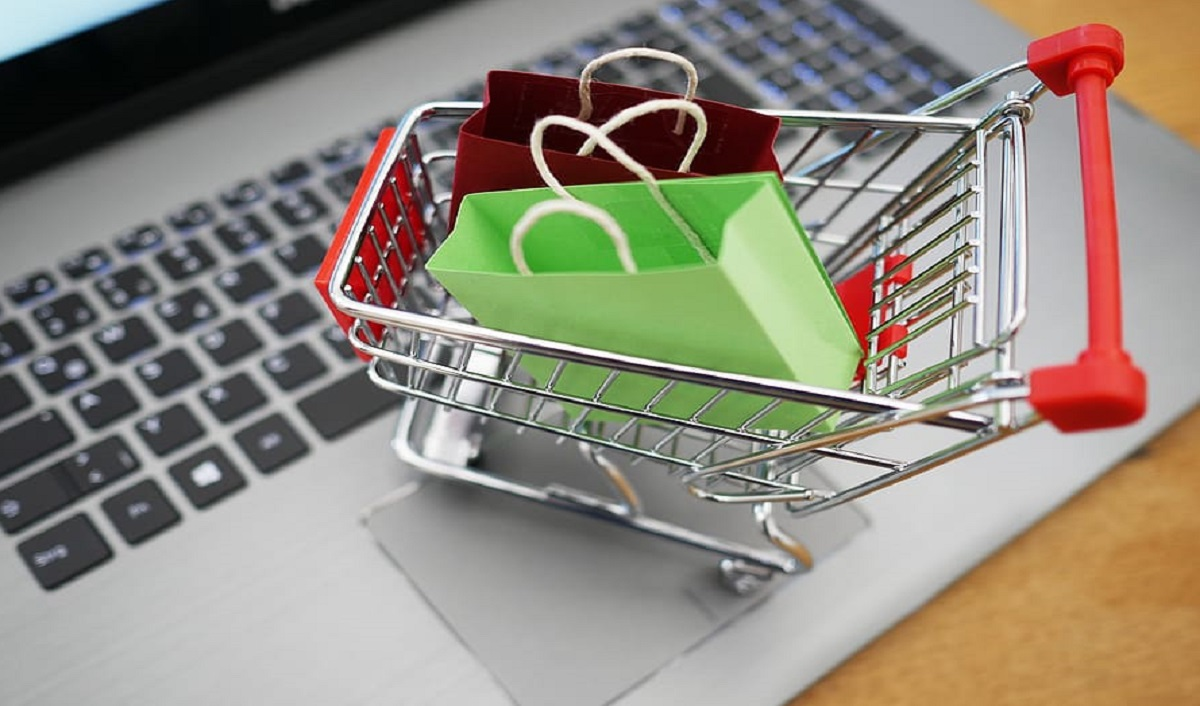

## 2. Objective/ Problem statement:

This project aims to use the information customers may leave in the form of the trace of browsing history data or user information when they visit an online shopping site. With the help of this information, the project aims to predict online shoppers' purchasing intention by using clickstream and session information data. The project aims to create a machine learning model based on this information to predict customer's purchasing intention. The Objective of the project is to build a Machine Learning Model that can predict customers purchase intention as accurately as possible.

## 3. Information about the dataset:

The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. 

The dataset consists of 18 attributes.And the 'Revenue' attribute is the target variable. 

#### Features:
1. ##### Administrative: 
This is the number of pages of this type (administrative) that the user visited.
2. ##### Administrative_Duration: 
This is the amount of time spent in this category of pages.
3. ##### Informational:
This is the number of pages of this type (informational) that the user visited.
4. ##### Informational_Duration:
This is the amount of time spent in this category of pages.
5. ##### ProductRelated:
This is the number of pages of this type (product related) that the user visited.
6. ##### ProductRelated_Duration:
This is the amount of time spent in this category of pages.
7. ##### BounceRates:
The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.
8. ##### ExitRates:
The percentage of pageviews on the website that end at that specific page.
9. ##### PageValues:
The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
10. ##### SpecialDay:
This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized.
11. ##### Month:
Contains the month the pageview occurred, in string form.
12. ##### OperatingSystems:
An integer value representing the operating system that the user was on when viewing the page.
13. ##### Browser:
An integer value representing the browser that the user was using to view the page.
14. ##### Region:
An integer value representing which region the user is located in.
15. ##### TrafficType:
An integer value representing what type of traffic the user is categorized into.
16. ##### VisitorType:
A string representing whether a visitor is New Visitor, Returning Visitor, or Other.
17. ##### Weekend:
A boolean representing whether the session is on a weekend.
18. ##### Revenue:
A boolean representing whether or not the user completed the purchase.


## 4. Data Exploration / EDA

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [2]:
df = pd.read_csv("C:\\Users\\Faheem\\Desktop\\online_shoppers_intention.csv")

### 4.1 Understanding the data type of attributes

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [90]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

#### Observations:
Looking at the data types of attributes in the dataset it can be observed that we have attributes of integer, float, object and bool type.

### 4.2 Univariate analysis

This type of analysis involves analysing every single attribute on it's own to understand its nature and characteristics.

#### 4.2.1 Target column: Revenue

In [80]:
df['Revenue'].dtype

dtype('bool')

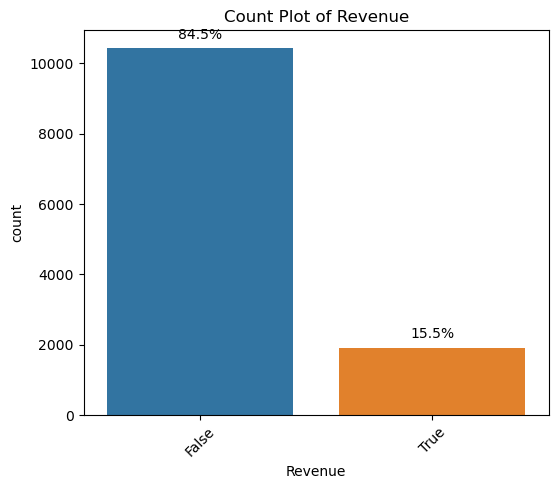

In [47]:
def visualize_revenue(df, show_percentages=True):
    plt.figure(figsize=(6, 5))
    ax = sns.countplot(data=df, x='Revenue')

    total = len(df['Revenue'])
    # represents percenatge count 
    if show_percentages:
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    else:
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    # sets the title to the plot
    plt.title('Count Plot of Revenue')
    plt.xticks(rotation=45)
    plt.show()

# Create count plot for 'Revenue' with percentages displayed
visualize_revenue(df)


Observations:
1. The target column revenue has 2 unique values and the data type of this column is bool.
2. It can be observed that 84.5% users have not ended up purchasing. And only 15.5% of users shopped online.
3. This represents a class imbalance and this issue needs to be addressed and the classes hav to balanced prior to data modelling.

#### 4.2.2  Other important visualizations

1. SpecialDay
2. Month
3. Operating system
4. Browser
5. Region
6. TrafficType
7. VisitorType
8. Weekend


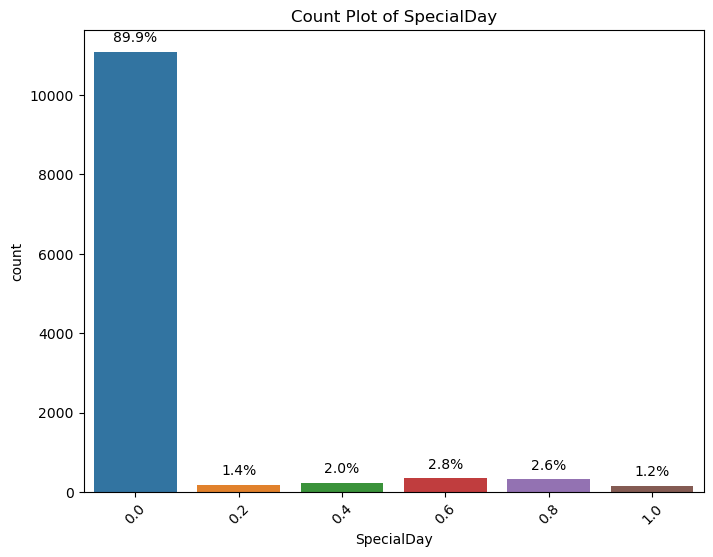

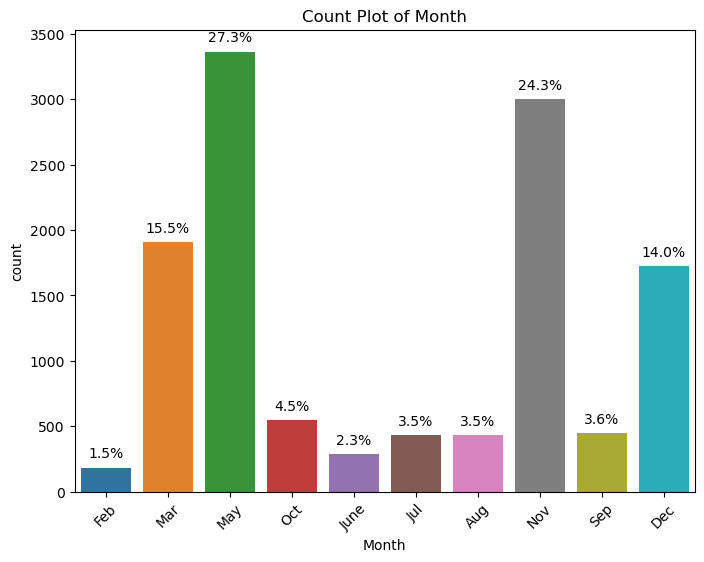

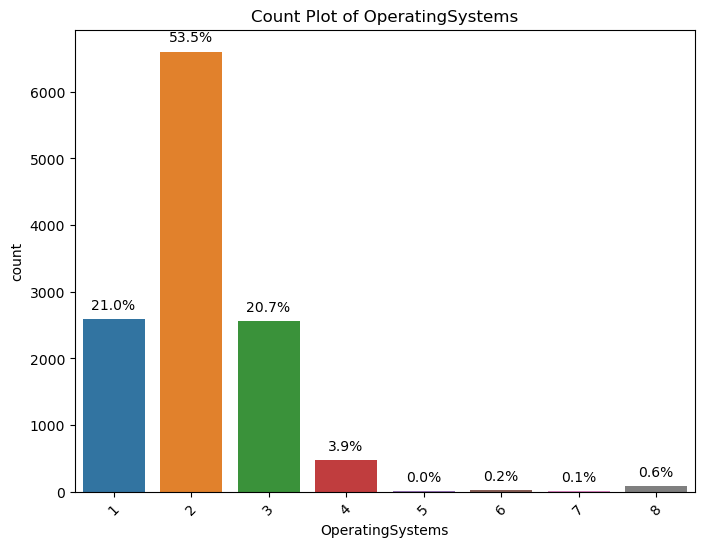

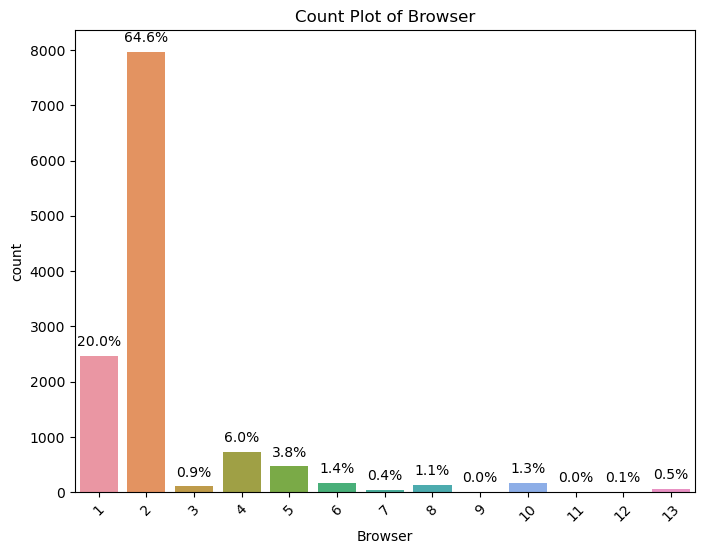

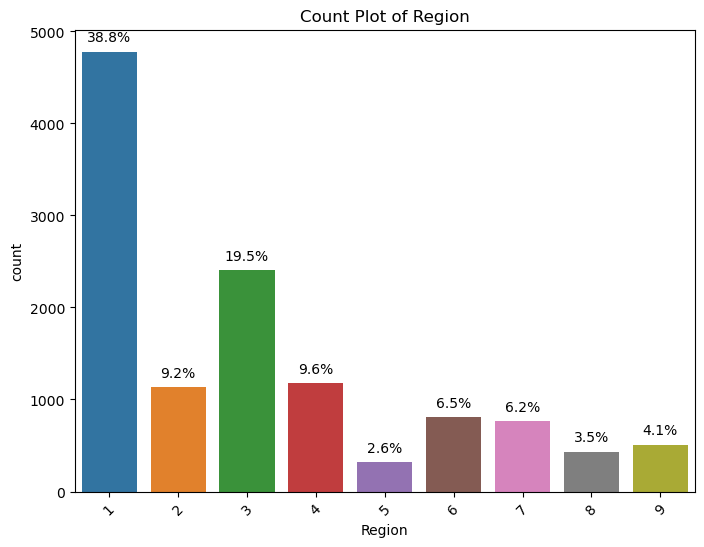

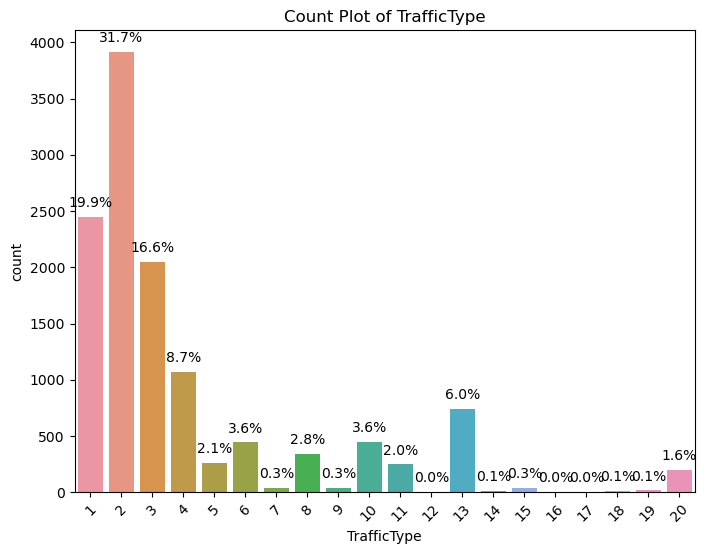

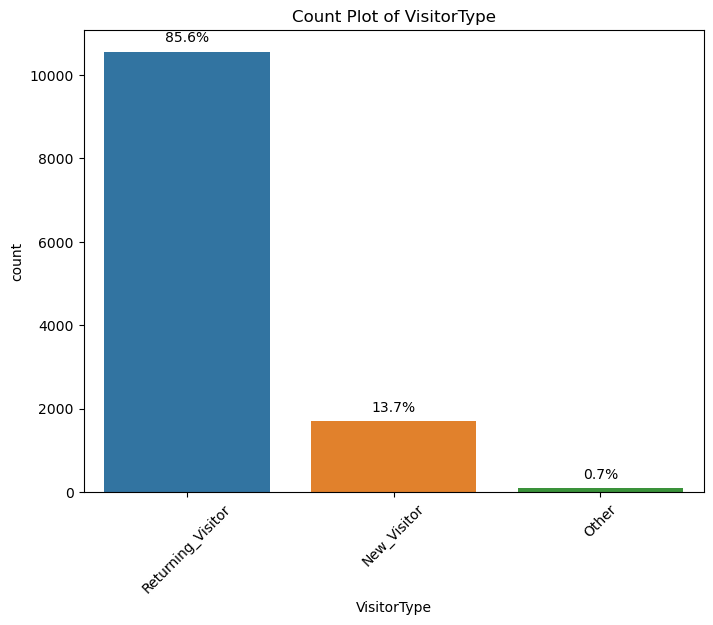

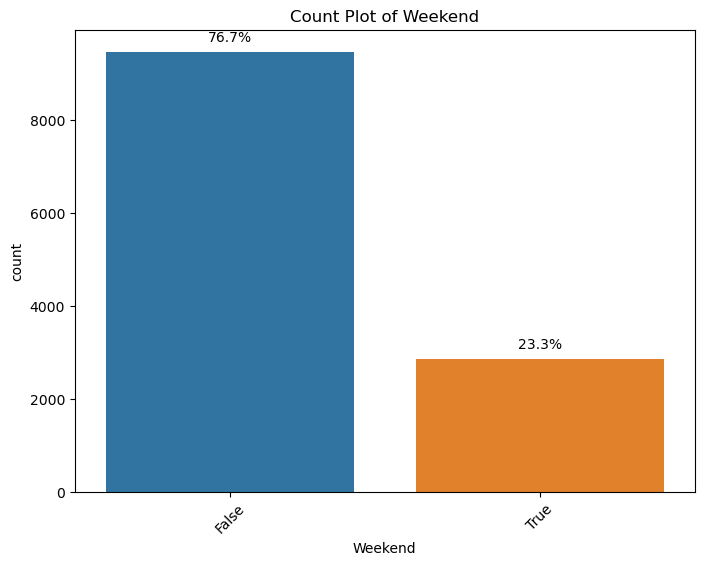

In [88]:
# List of categorical features to visualize
features = ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
# Function to visualize categorical features
def visualize_categorical_features(df, features):
    for feature in features:
        plt.figure(figsize=(8, 6))
        ax = sns.countplot(data=df, x=feature)
        # Set title and rotate x-axis labels for better visibility
        plt.title(f'Count Plot of {feature}')
        plt.xticks(rotation=45)

        total_samples = len(df[feature])
        # Annotate each bar with the percentage it represents
        for p in ax.patches:
            percentage = p.get_height() / total_samples * 100
            ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
        plt.show()

visualize_categorical_features(df, features)


#### Observations:

Special day:

1. It has 6 unique features.
2. 89.9.% of samples in dataset are 0.0 close to the special days followed by 1.4% samples for 0.2 and 2.0% samples for 0.4.

Month:
1. The highest number of user views have taken place in the month of May, November, March and December.
2. This represents that these specific months may have some special days like festivals/holidays/events.

Operating system: 
1. It has 8 unique values.
2. Type 2 was the highest operating system used by users followed by Type 1 and type 3.

Browser:
1. Browser has 13 unique values.
2. Type 2 browser was the highest used browser followed by type 1 and typpe 4 browser.

Weekend:
1. Weekend has two unique values True and False, and the dtype of this attribute is bool.
2. It can be observed that 76.7% of the purchases were made on weekdays and the rest 23.3% purchases were made on weekends.
3. The Weeekend feature also represents class imbalance.

Visitor Type:
1. Visitor type column has 3 unique values and it is 'object' type.
2. The frequency count of 'Returning visitors' is much more more higher with a percentage of 85.6
3. The 'new-visitors' contribute to 13.7% and 'other' ones with less than 0.7%

Traffic Type:
1. Traffic type has 20 unique values and it is 'int' type.
2. 31.7% users are engaged in Type 2 traffic followed by type 1 and type 3 traffic.
3. The data is exponentially distributed.

Region:
1. Region attribute as 9 unique values and it is of 'int' type.
2. The plot represents exponential distribution.
3. 38.8% users are located in region 1 followed by 19.5% users in region 3 and 9.6% users in region 4.


### 4.3 Bivariate analysis
This type of analysis includes visualizing every attribute w.r.t target variable.

1. Administrative_Duration w.r.t. revenue
2. Informational_Duration w.r.t. revenue
3. ProductRelated_Duration w.r.t. revenue
4. BounceRates w.r.t. revenue
5. ExitRates w.r.t. revenue
6. PageValues w.r.t revenue
7. Month w.r.t revenue
8. Region w.r.t revenue
9. TrafficType w.r.t revenue
10. VisitorType w.r.t revenue




#### 4.3.1 Administrative_Duration w.r.t. revenue

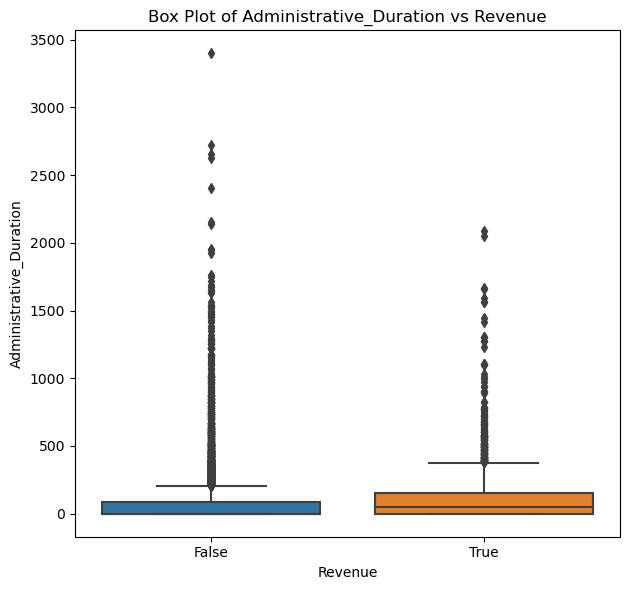

In [104]:
plt.figure(figsize=(12, 6))

# Box Plot of Administrative_Duration w.r.t. Revenue
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Revenue', y='Administrative_Duration')
plt.title('Box Plot of Administrative_Duration vs Revenue')

plt.tight_layout()
plt.show()


In [110]:
summary_stats = df.groupby('Revenue')['Administrative_Duration'].describe()
summary_stats


count        mean         std  min  25%        50%         75%  \
Revenue                                                                     
False    10422.0   73.740111  171.017970  0.0  0.0   0.000000   83.000000   
True      1908.0  119.483244  201.114732  0.0  0.0  52.366667  151.083333   

             max  
Revenue           
False    3398.75  
True     2086.75

#### Observations:
1. The Administrative_Duration has potential outliers for both Non-revenue and Revenue transactions.
2. There is a notable difference between mean and median for both Non-revenue and Revenue transactions , this represents the distribution is right skewed.
3. The data has a high standard deviation for both Non-revenue and Revenue transactions indicating  high spread of data around the mean.

#### 4.3.2 Informational_Duration w.r.t. revenue

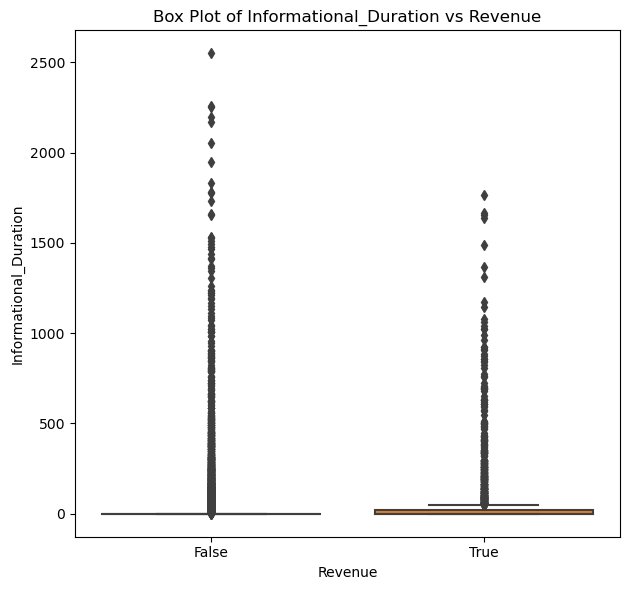

In [114]:
plt.figure(figsize=(12, 6))

# Box Plot of Administrative_Duration w.r.t. Revenue
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Revenue', y='Informational_Duration')
plt.title('Box Plot of Informational_Duration vs Revenue')

plt.tight_layout()
plt.show()


In [116]:
summary_stats = df.groupby('Revenue')['Informational_Duration'].describe()
summary_stats

count       mean         std  min  25%  50%   75%          max
Revenue                                                                  
False    10422.0  30.236237  133.909306  0.0  0.0  0.0   0.0  2549.375000
True      1908.0  57.611427  171.619131  0.0  0.0  0.0  19.0  1767.666667

#### Observations:
1. The Informational_Duration has potential outliers for both Non-revenue and Revenue transactions.
2. There is a notable difference between mean and median for both Non-revenue and Revenue transactions , this represents the distribution is right skewed.
3. The data has a high standard deviation for both Non-revenue and Revenue transactions indicating high spread of data around the mean.
4. 75% percentile values for non-revenue transactions are below 0. While the 50%  percentile values for revenue transactions are below 0.

#### 4.3.3 ProductRelated_Duration w.r.t. revenue

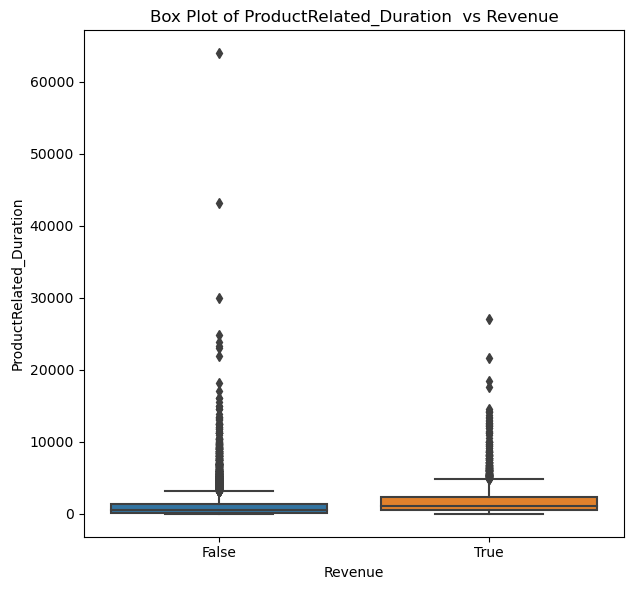

In [121]:
plt.figure(figsize=(12, 6))

# Box Plot of Administrative_Duration w.r.t. Revenue
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Revenue', y='ProductRelated_Duration')
plt.title('Box Plot of ProductRelated_Duration  vs Revenue')

plt.tight_layout()
plt.show()


In [122]:
summary_stats = df.groupby('Revenue')['ProductRelated_Duration'].describe()
summary_stats


count         mean          std  min        25%         50%  \
Revenue                                                                  
False    10422.0  1069.987809  1803.797757  0.0  151.00000   510.19000   
True      1908.0  1876.209615  2312.214392  0.0  541.90625  1109.90625   

                 75%          max  
Revenue                            
False    1331.816667  63973.52223  
True     2266.011310  27009.85943

#### Observations:
1. The ProductRelated_Duration has potential outliers for both Non-revenue and Revenue transactions.
2. There is a notable difference between mean and median for both Non-revenue and Revenue transactions , this represents the distribution is right skewed.
3. The data has a notable standard deviation for both Non-revenue and Revenue transactions indicating spread of data around the mean.

#### 4.3.4 BounceRates w.r.t. revenue

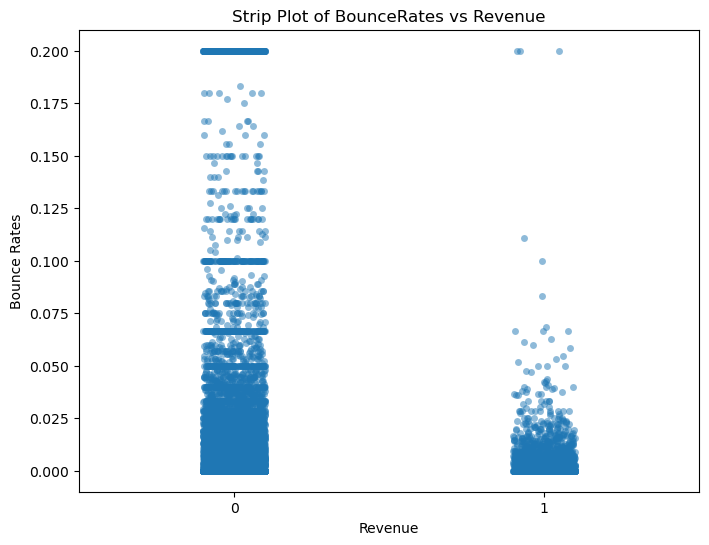

In [53]:
plt.figure(figsize=(8, 6))
# Create a strip plot to visualize BounceRates vs Revenue
# 'jitter' adds a small amount of random noise to separate overlapping points
# 'alpha' controls the transparency of the points
sns.stripplot(data=df, x='Revenue', y='BounceRates', jitter=True, alpha=0.5)
plt.title('Strip Plot of BounceRates vs Revenue')
plt.xlabel('Revenue')
plt.ylabel('Bounce Rates')
plt.show()


#### Observations:
1. The above plot has many outliers for non-revenue transactions.
2. Users who do not intend to buy anything are likely to bounce back when compared to the users who end up buying.

#### 4.3.5 ExitRates w.r.t. revenue

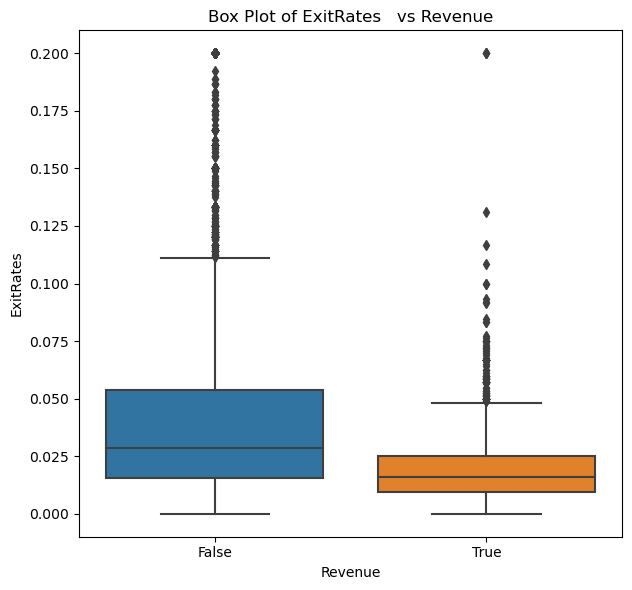

In [135]:
plt.figure(figsize=(12, 6))
# Create a subplot with 1 row and 2 columns, and set the current plot to the first subplot (1, 2, 1)
plt.subplot(1, 2, 1)
# Create a box plot to visualize ExitRates vs Revenue
sns.boxplot(data=df, x='Revenue', y='ExitRates')
plt.title('Box Plot of ExitRates   vs Revenue')
# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()
plt.show()

#### Observations:
1. There are outliers for both Revenue and non-revenue transactions.

#### 4.3.6 PageValues w.r.t. revenue

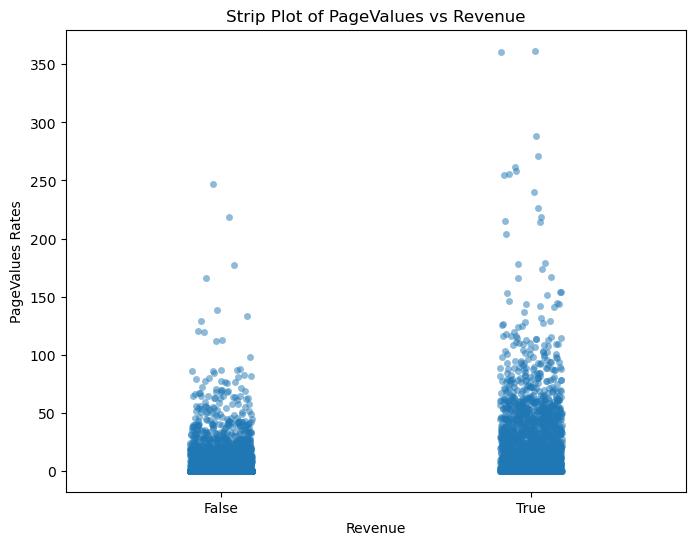

In [127]:
# Set the figure size for the plot
plt.figure(figsize=(8, 6))
# Create a strip plot to visualize PageValues vs Revenue
# 'jitter' adds a small amount of random noise to separate overlapping points
# 'alpha' controls the transparency of the points
sns.stripplot(data=df, x='Revenue', y='PageValues', jitter=True, alpha=0.5)
# Set the title of the plot
plt.title('Strip Plot of PageValues vs Revenue')
plt.xlabel('Revenue')
plt.ylabel('PageValues Rates')
plt.show()

#### Observations:
1. Revenue transactions have higher number of outliers compared with non-revenue transactions.
2. Pagevalues are highly influenced to purchased(True) a product.

#### 4.3.7 Month w.r.t revenue

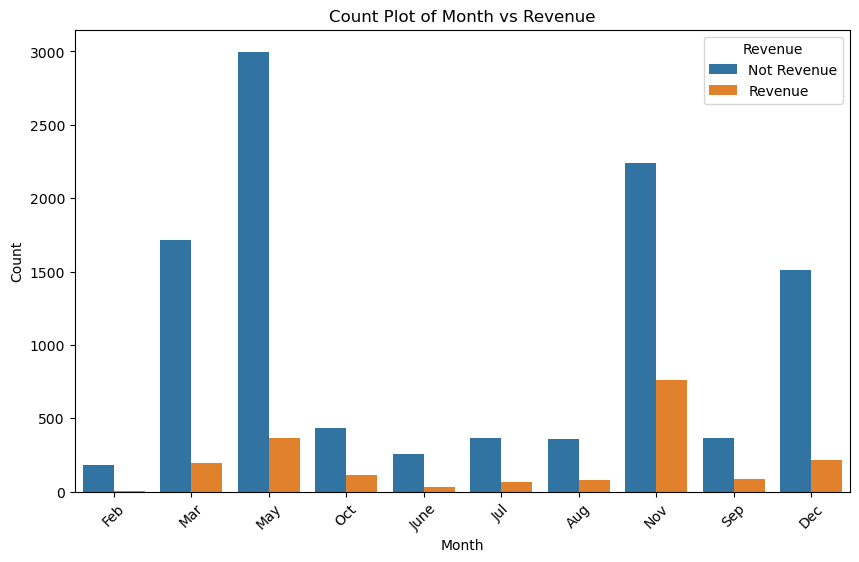

In [128]:
plt.figure(figsize=(10, 6))
# Create a count plot to visualize the distribution of 'Month' vs 'Revenue', with 'Revenue' as hue
sns.countplot(data=df, x='Month', hue='Revenue')
plt.title('Count Plot of Month vs Revenue')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Revenue', labels=['Not Revenue', 'Revenue'])
plt.show()


#### Observations:
1. November, May and March are the months with highest revenue transactions.
2. On the other hand May, November and december are the months with no revenue transactions.

#### 4.3.8 Region w.r.t revenue

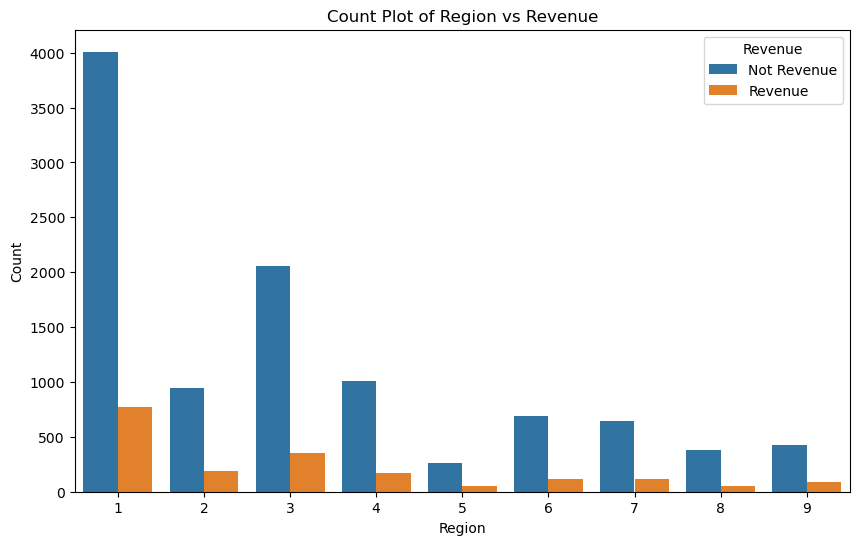

In [129]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Region', hue='Revenue')
plt.title('Count Plot of Region vs Revenue')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Revenue', labels=['Not Revenue', 'Revenue'])
plt.show()

#### Observations:
1. Region 1 , 3 and 2 are the areas with highest revenue transactions.

#### 4.3.9 TrafficType w.r.t revenue

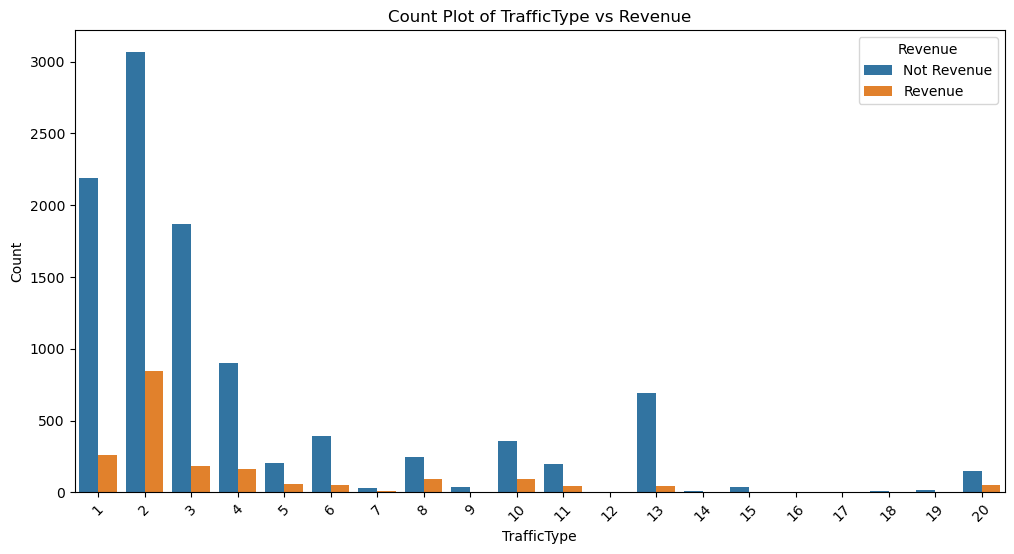

In [131]:
plt.figure(figsize=(12, 6))
# Create a count plot to visualize the distribution of 'Region' vs 'Revenue', with 'Revenue' as hue
sns.countplot(data=df, x='TrafficType', hue='Revenue')
# Set the title of the plot
plt.title('Count Plot of TrafficType vs Revenue')
plt.xlabel('TrafficType')
plt.ylabel('Count')
# Add a legend with custom labels
plt.legend(title='Revenue', labels=['Not Revenue', 'Revenue'])
plt.xticks(rotation=45)
plt.show()

#### Observations:
1. Traffic type 2 followed by 1 and 3 are the highest categories to have revenue transactions.

#### 4.3.10 VisitorType w.r.t revenue

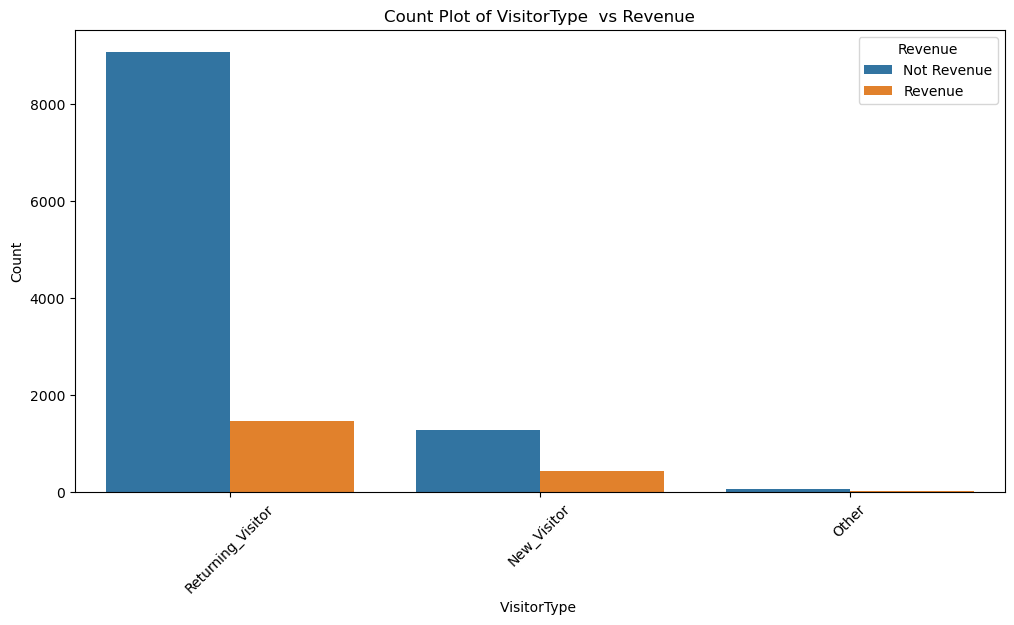

In [132]:
plt.figure(figsize=(12, 6))
# Create a count plot to visualize the distribution of 'VisitorType' vs 'Revenue', with 'Revenue' as hue
sns.countplot(data=df, x='VisitorType', hue='Revenue')
# Set the title of the plot
plt.title('Count Plot of VisitorType  vs Revenue')
plt.xlabel('VisitorType ')
plt.ylabel('Count')
# Add a legend with custom labels
plt.legend(title='Revenue', labels=['Not Revenue', 'Revenue'])
plt.xticks(rotation=45)
plt.show()

#### Observations:
1. Returning visitors are more likely to buy new product.

### 4.4 Multivariate analysis
This type of analysis involves visualizing multiple features w.r.t target variable

1. Month, BounceRates w.r.t. revenue
2. Month, ExitRates w.r.t. revenue
3. Month, PageValues w.r.t. revenue
4. VisitorType, BounceRates w.r.t. revenue
5. VisitorType, ExitRates w.r.t. revenue
6. VisitorType, PageValues w.r.t. revenue

#### 4.4.1 Month, BounceRates w.r.t. revenue

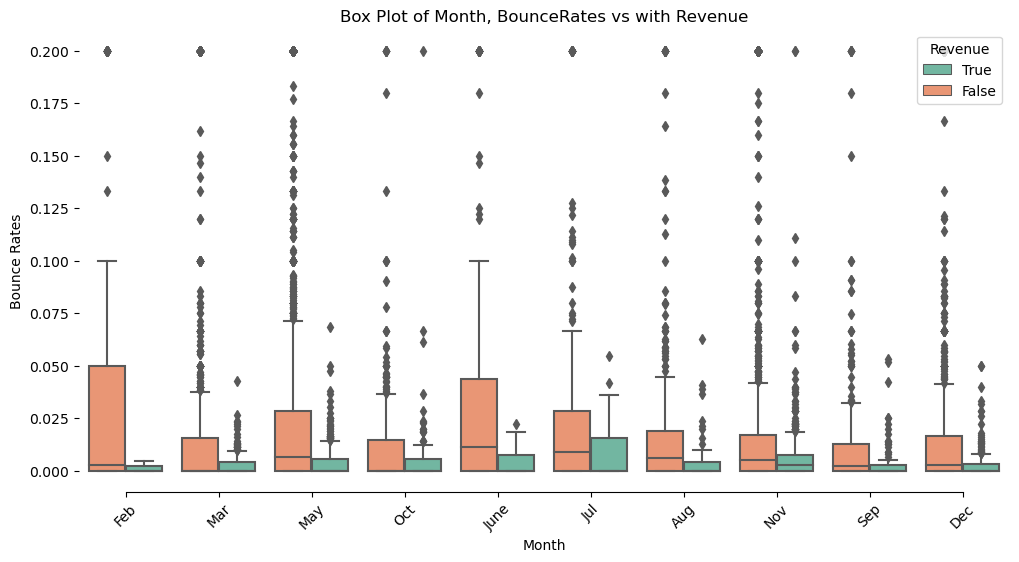

In [160]:
plt.figure(figsize=(12, 6))
# Define a color palette for the 'Revenue' categories
palette = {True: '#66c2a5', False: '#fc8d62'} 
# Create a box plot to visualize the distribution of 'BounceRates' across months, with 'Revenue' as hue
ax = sns.boxplot(data=df, x='Month', y='BounceRates', hue='Revenue', palette=palette)
plt.title('Box Plot of Month, BounceRates vs with Revenue')
plt.xlabel('Month')
plt.ylabel('Bounce Rates')
plt.xticks(rotation=45)

# Get the handles and labels for the legend
handles, labels = ax.get_legend_handles_labels()

# Reorder the legend labels and handles
order = [1, 0]  # Since 'Revenue' is True and 'Non-Revenue' is False
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title='Revenue', loc='upper right')

sns.despine(trim=True, left=True)
plt.show()

#### Observations:
1. For non-revenue transactions, the highest bounce rates are in the month of Feb followed by June and July.
2. For revenue transactions, the highest bounce rates are in the month of Jul followed by June and November.
3. The plot has many outliers.

#### 4.4.2 Month, ExitRates w.r.t. revenue

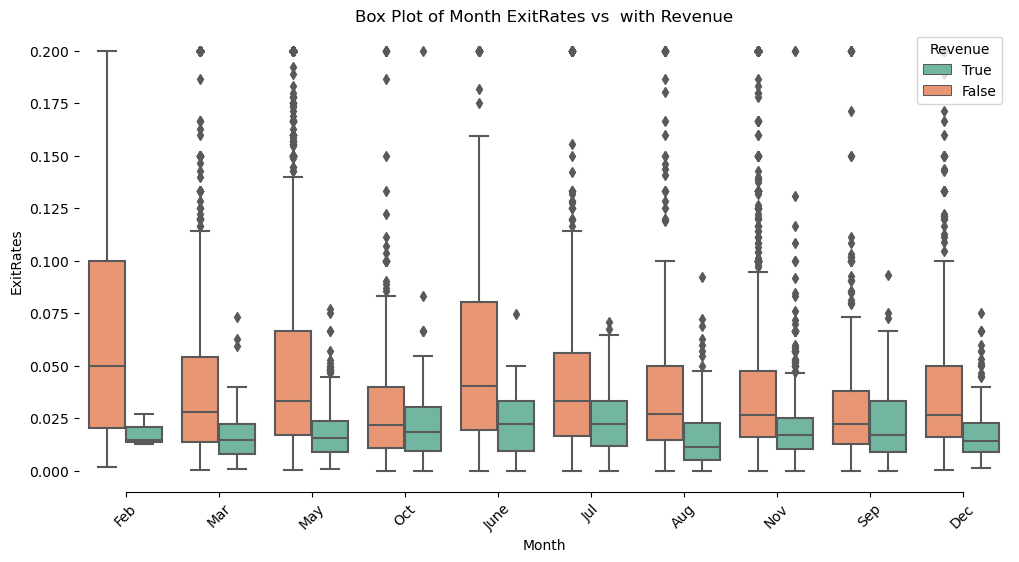

In [161]:
plt.figure(figsize=(12, 6))
palette = {True: '#66c2a5', False: '#fc8d62'}  # Subtle colors
ax = sns.boxplot(data=df, x='Month', y='ExitRates', hue='Revenue', palette=palette)
plt.title('Box Plot of Month ExitRates vs  with Revenue')
plt.xlabel('Month')
plt.ylabel('ExitRates')
plt.xticks(rotation=45)

# Get the handles and labels for the legend
handles, labels = ax.get_legend_handles_labels()

# Reorder the legend labels and handles
order = [1, 0]  # Since 'Revenue' is True and 'Non-Revenue' is False
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title='Revenue', loc='upper right')

sns.despine(trim=True, left=True)
plt.show()

Observations:
1. The highest Exitrates for non-revenue transactions have taken place in the month of Feb followed by June and May.
2. The highest Exitrates for revenue transactions have taken place in the month of June followed by July and September.
3. This plot has outliers too.

#### 4.4.3 Month, PageValues w.r.t. revenue

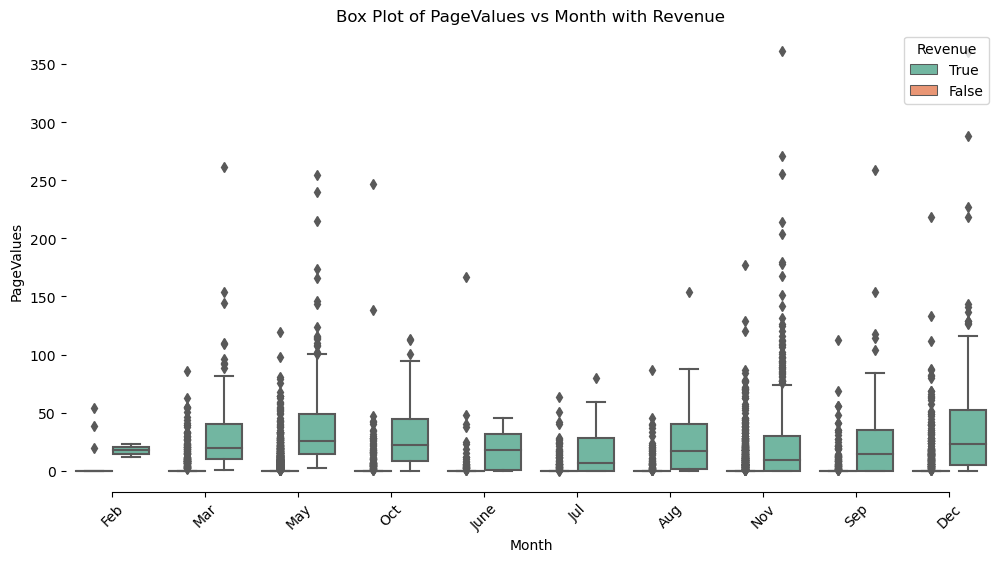

In [155]:
plt.figure(figsize=(12, 6))
palette = {True: '#66c2a5', False: '#fc8d62'}  # Subtle colors
ax = sns.boxplot(data=df, x='Month', y='PageValues', hue='Revenue', palette=palette)
plt.title('Box Plot of PageValues vs Month with Revenue')
plt.xlabel('Month')
plt.ylabel('PageValues')
plt.xticks(rotation=45)

# Get the handles and labels for the legend
handles, labels = ax.get_legend_handles_labels()

# Reorder the legend labels and handles
order = [1, 0]  # Since 'Revenue' is True and 'Non-Revenue' is False
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title='Revenue', loc='upper right')

sns.despine(trim=True, left=True)
plt.show()

#### Observations:
1. Month vs PageValues are normally distributed when users purchase a product.
2. There are lots of outlier also here.

#### 4.4.4 VisitorType, BounceRates w.r.t. revenue

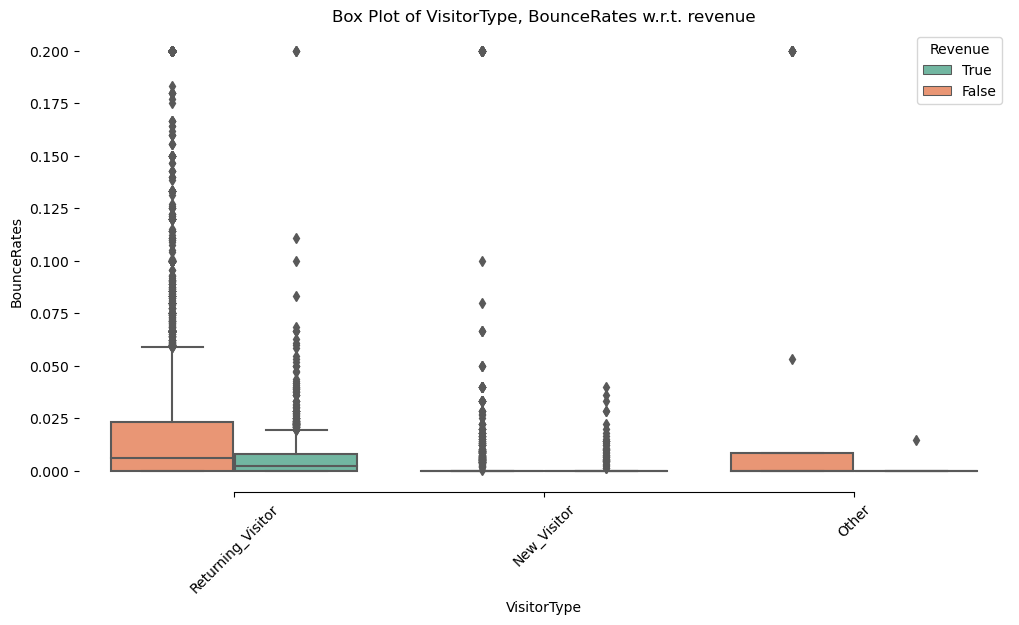

In [156]:
plt.figure(figsize=(12, 6))
palette = {True: '#66c2a5', False: '#fc8d62'}  
ax = sns.boxplot(data=df, x='VisitorType', y='BounceRates', hue='Revenue', palette=palette)
plt.title('Box Plot of VisitorType, BounceRates w.r.t. revenue')
plt.xlabel('VisitorType')
plt.ylabel('BounceRates')
plt.xticks(rotation=45)

# Get the handles and labels for the legend
handles, labels = ax.get_legend_handles_labels()

# Reorder the legend labels and handles
order = [1, 0]  # Since 'Revenue' is True and 'Non-Revenue' is False
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title='Revenue', loc='upper right')

sns.despine(trim=True, left=True)
plt.show()

#### Observations:
1. For Revenue and non-revenue transactions, Returning-visitors have higher Bounce rates.

#### 4.4.5 VisitorType, ExitRates w.r.t. revenue

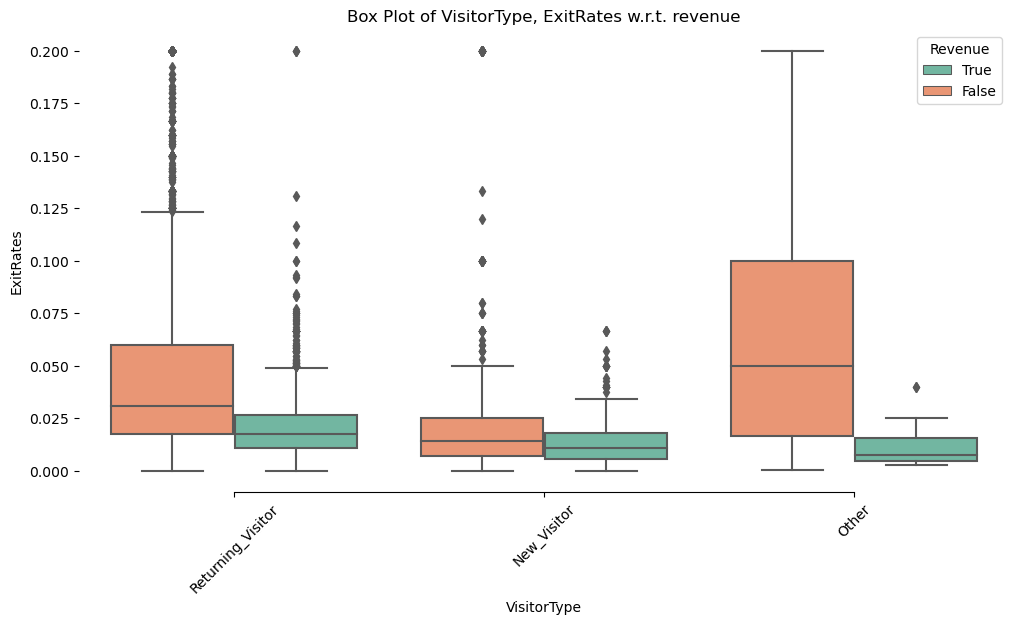

In [157]:
plt.figure(figsize=(12, 6))
palette = {True: '#66c2a5', False: '#fc8d62'}  # Subtle colors
ax = sns.boxplot(data=df, x='VisitorType', y='ExitRates', hue='Revenue', palette=palette)
plt.title('Box Plot of VisitorType, ExitRates w.r.t. revenue')
plt.xlabel('VisitorType')
plt.ylabel('ExitRates')
plt.xticks(rotation=45)

# Get the handles and labels for the legend
handles, labels = ax.get_legend_handles_labels()

# Reorder the legend labels and handles
order = [1, 0]  # Since 'Revenue' is True and 'Non-Revenue' is False
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title='Revenue', loc='upper right')

sns.despine(trim=True, left=True)
plt.show()

#### Observations:
1. For non-revenue transactions, "Returning visitors" have more exits rates followed by "Other" and "New_Visitor".
2. For revenue transactions, "Returning visitors" have more exits rates followed by "New-visitor" and "other".
3. The plot has significant outliers.

#### 4.4.6 VisitorType, PageValues w.r.t. revenue

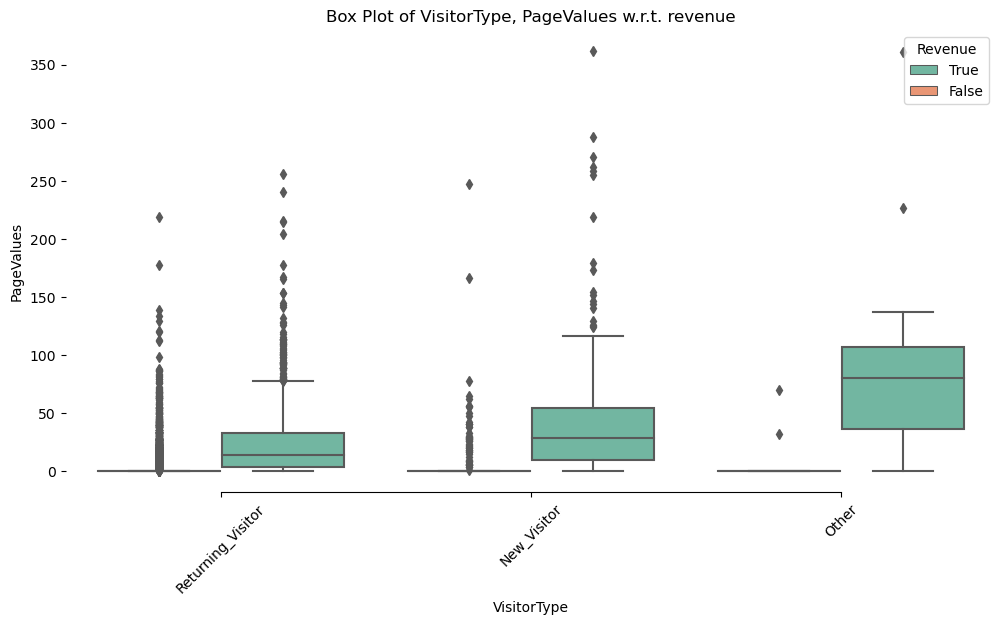

In [159]:
plt.figure(figsize=(12, 6))
palette = {True: '#66c2a5', False: '#fc8d62'}  # Subtle colors
ax = sns.boxplot(data=df, x='VisitorType', y='PageValues', hue='Revenue', palette=palette)
plt.title('Box Plot of VisitorType, PageValues w.r.t. revenue')
plt.xlabel('VisitorType')
plt.ylabel('PageValues')
plt.xticks(rotation=45)

# Get the handles and labels for the legend
handles, labels = ax.get_legend_handles_labels()

# Reorder the legend labels and handles
order = [1, 0]  # Since 'Revenue' is True and 'Non-Revenue' is False
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title='Revenue', loc='upper right')

sns.despine(trim=True, left=True)
plt.show()

#### Observations:
1. The plot has outliers.
2. For revenue transactions, "Others" followed by "Returning-visitors" and "New visitor" have highest Pagevalues.

## 5. Outlier Analysis

We intend to represent the count of outliers in each column that have outliers and visualize them.

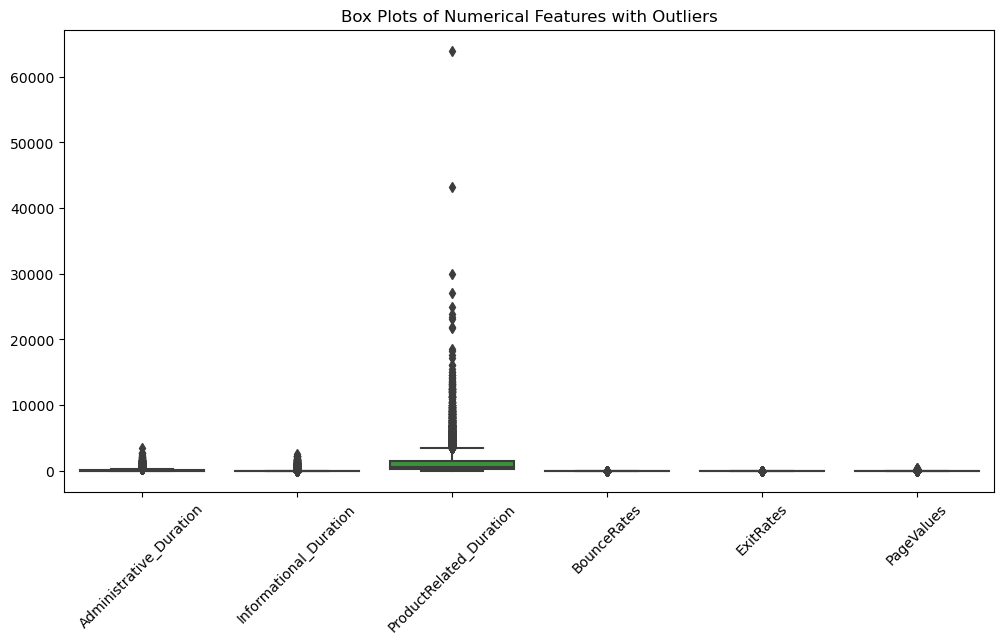

Percentage of Outliers:
Administrative_Duration    1.881590
Informational_Duration     1.865369
ProductRelated_Duration    1.776156
BounceRates                5.742092
ExitRates                  5.782644
PageValues                 2.100568
dtype: float64


In [167]:
from scipy.stats import zscore
selected_columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

# Calculate z-scores for each column
z_scores = zscore(df[selected_columns])

# Find values more than 3 standard deviations away from the mean
outliers = (z_scores > 3) | (z_scores < -3)

# Calculate the percentage of outliers for each column
percentage_outliers = outliers.mean(axis=0) * 100

# Plotting the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[selected_columns])
plt.title('Box Plots of Numerical Features with Outliers')
plt.xticks(rotation=45)
plt.show()

# Displaying the percentage of outliers
print("Percentage of Outliers:")
print(percentage_outliers)

#### Observations:
1. Z-score method was used to find the outlers which are 3 Standard deviations away from mean.
2. The above percentage represents that we have less than 6% percentage of outliers.
3. We intend not to treat outliers from data and instead use algorithms which are robust to outliers.

## 6. Cluster Analysis

Cluster Analysis involves understanding user characteristics. In this analysis, the user behaviour was observed for BounceRates. The outcome of the analysis can be used to plan customer retention strategies.

1. Administrative Duration vs  BounceRates
2. Informative Duration vs BounceRates
3. ProductRelated_Duration vs BounceRates

### 6.1 Administrative Duration vs BounceRates

Shape of the dataset:  (12330, 2)


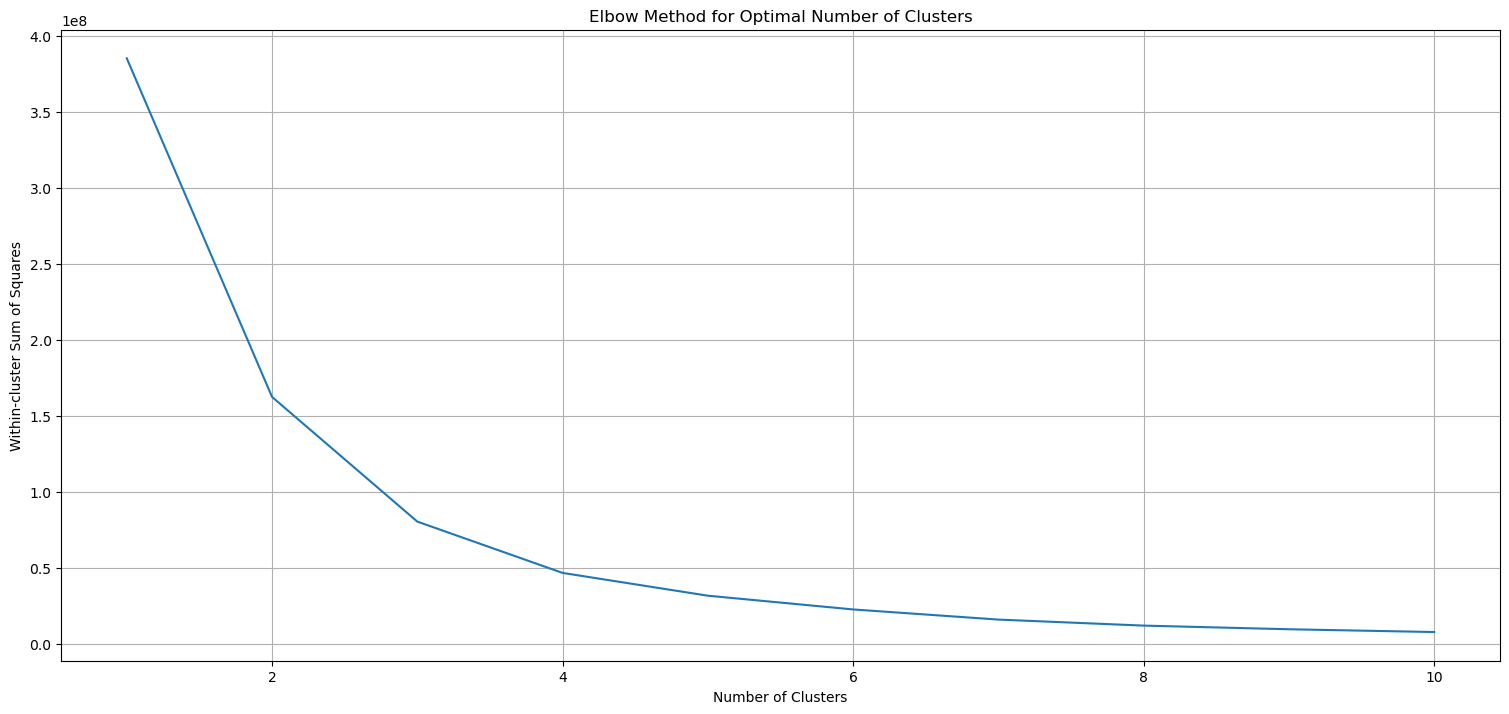

In [191]:
from sklearn.cluster import KMeans
# Preparing the dataset
x = df.iloc[:, [1, 6]].values

# Checking the shape of the dataset
print("Shape of the dataset: ", x.shape)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                max_iter=200,
                n_init=10,
                random_state=0,
                algorithm='elkan',
                tol=0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.figure(figsize=(15, 7))
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


#### Observations:

Finding the optimal number of clusters is an important step in K-Means clustering. 

##### Elbow Method:
In this method, you plot the within-cluster sum of squares (WCSS) for different values of k (number of clusters). WCSS measures the sum of squared distances between data points and their assigned cluster centers. The idea is that as you increase the number of clusters, WCSS tends to decrease because data points are closer to their cluster centers. However, beyond a certain point, adding more clusters doesn't significantly reduce WCSS. This point is usually referred to as the "elbow point," and it represents a good compromise between fitting the data well and avoiding overfitting.(Open AI)

1. The optimal number of clusters from the above plot is 3. so we can group customers into 3 segments.



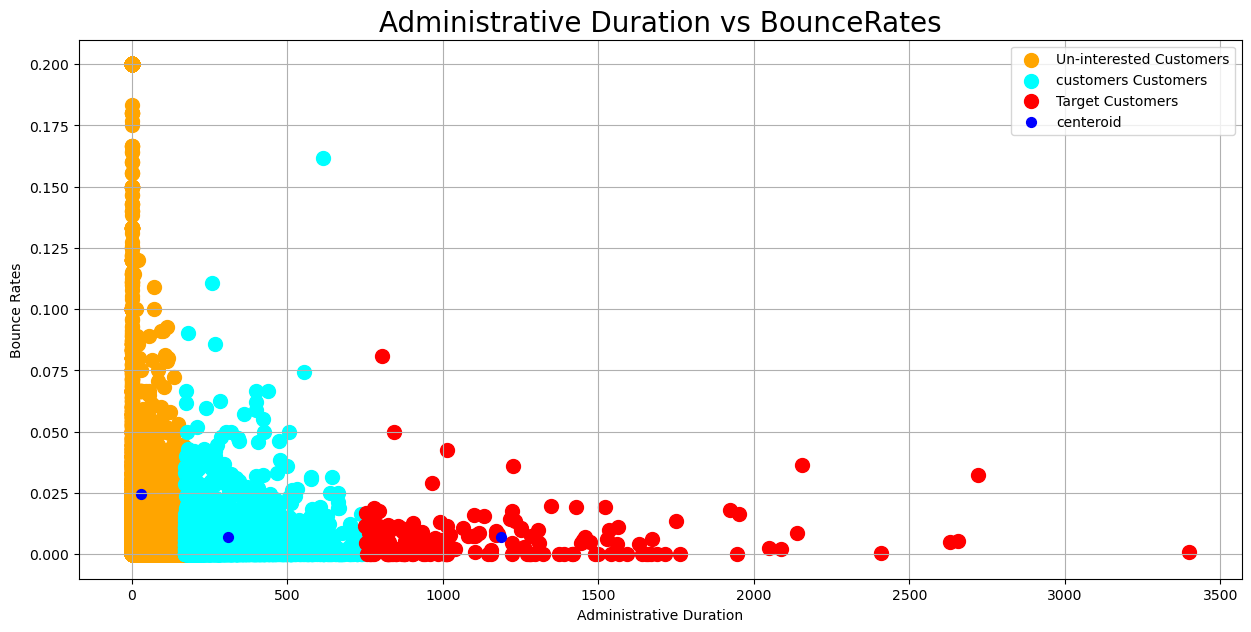

In [196]:
# Initialize the KMeans algorithm with parameters
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
# Fit the KMeans model and predict cluster labels
y_means = km.fit_predict(x)
# Scatter plot for different clusters
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'orange', label = 'Un-interested Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'customers Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'red', label = 'Target Customers')
# Plot the cluster centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centeroid')
# Set title and labels
plt.title('Administrative Duration vs BounceRates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

#### Observations:
1. It can be inferred from this plot that users with more administartive duration are likely to have less Bounce rates compared to the ones with less Administartive duration.

### 6. 2 Informative Duration vs BounceRates

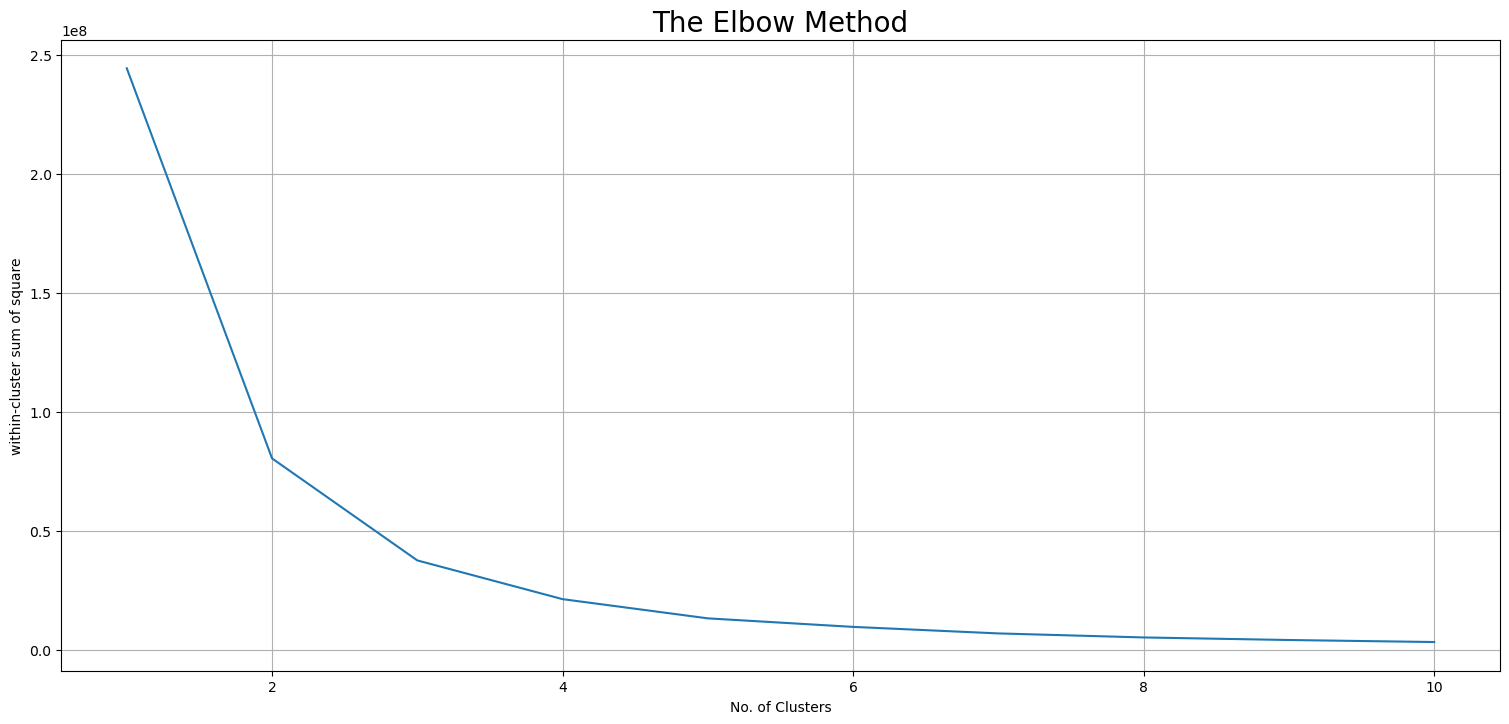

In [198]:
# cluster anaysis of Informational Duration vs Bounce Rates
x = df.iloc[:, [3, 6]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 200,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('within-cluster sum of square')
plt.show()

#### Observations:
1. The above plot represents that the optimal clusters are 2.

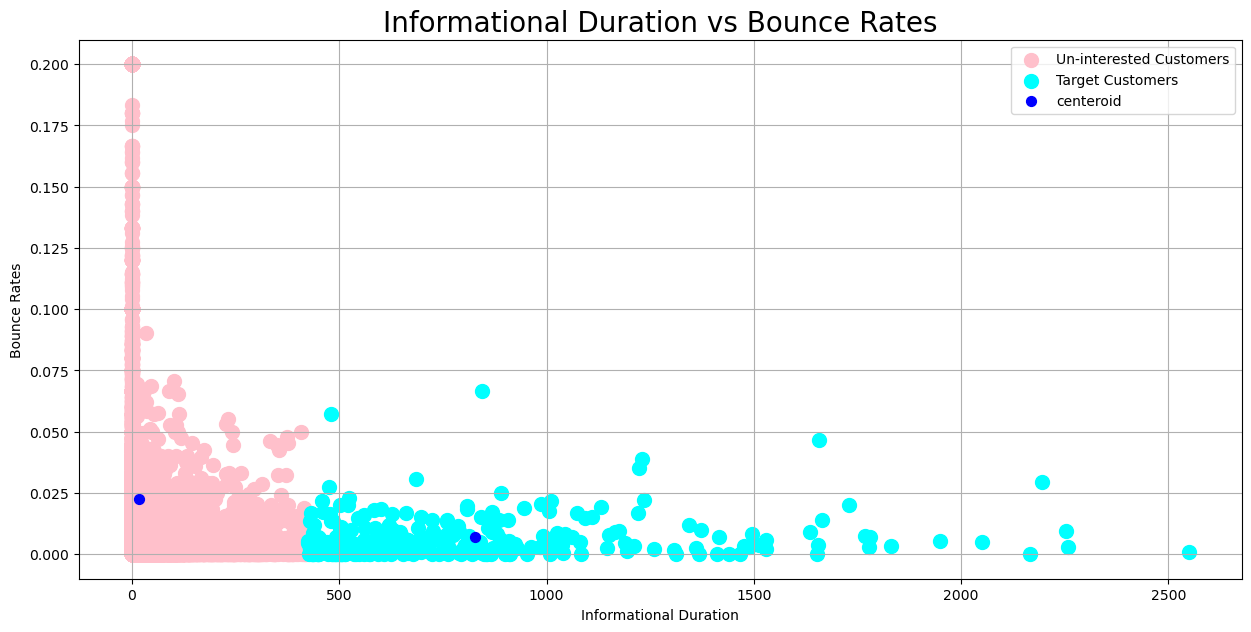

In [199]:
# Initialize the KMeans algorithm with parameters
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
# Fit the KMeans model and predict cluster labels
y_means = km.fit_predict(x)
# Scatter plot for different clusters
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'cyan', label = 'Target Customers')
# Plot the cluster centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()


#### Observations:
1. It can be infered that the customers who spent a longer Informational duration in a website are very less likely to bounce from the website that is navigating away from the website just after navigating one page of that website.

### 6.3 ProductRelated_Duration vs BounceRates

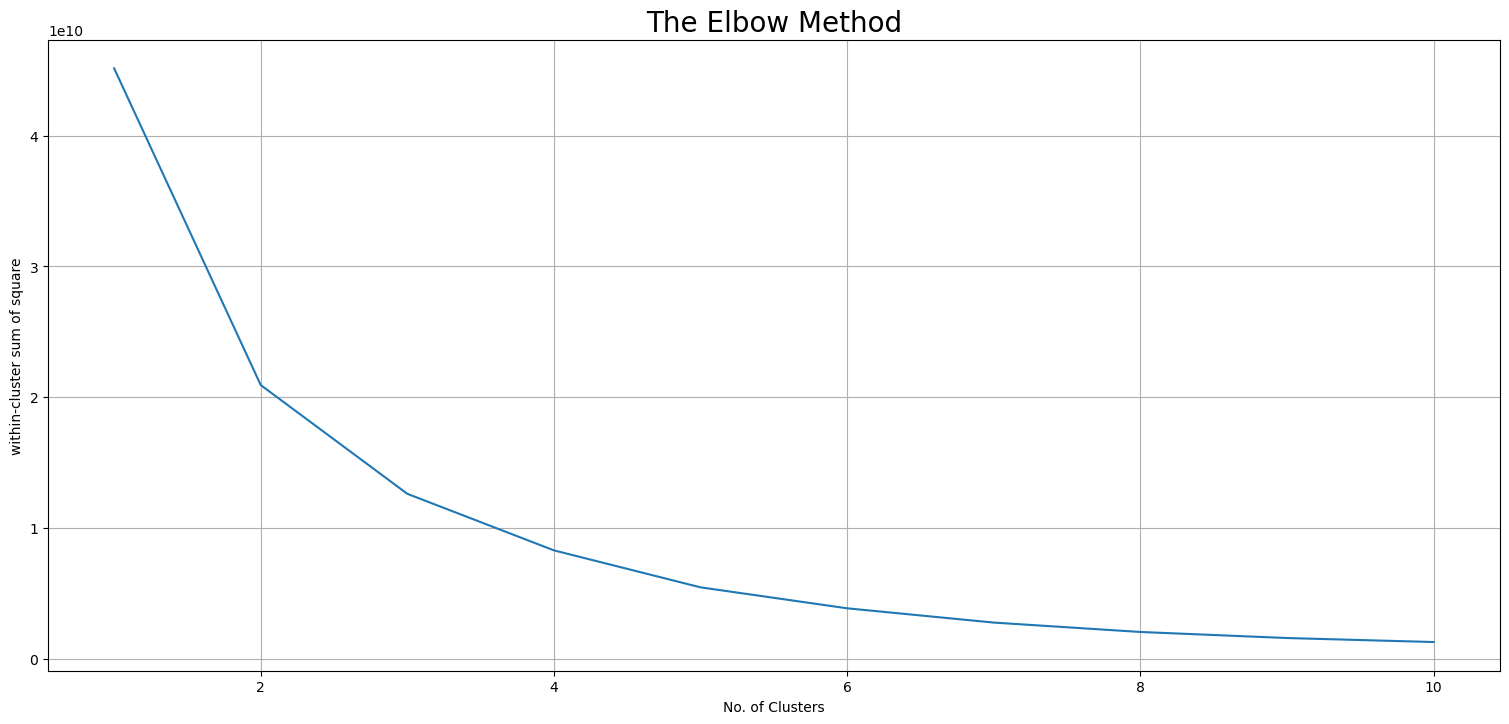

In [204]:
# cluster anaysis of Informational Duration vs Bounce Rates
x = df.iloc[:, [5, 6]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 200,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('within-cluster sum of square')
plt.show()

#### Observations:
1. The above plot represents that the optimal clusters are 2.

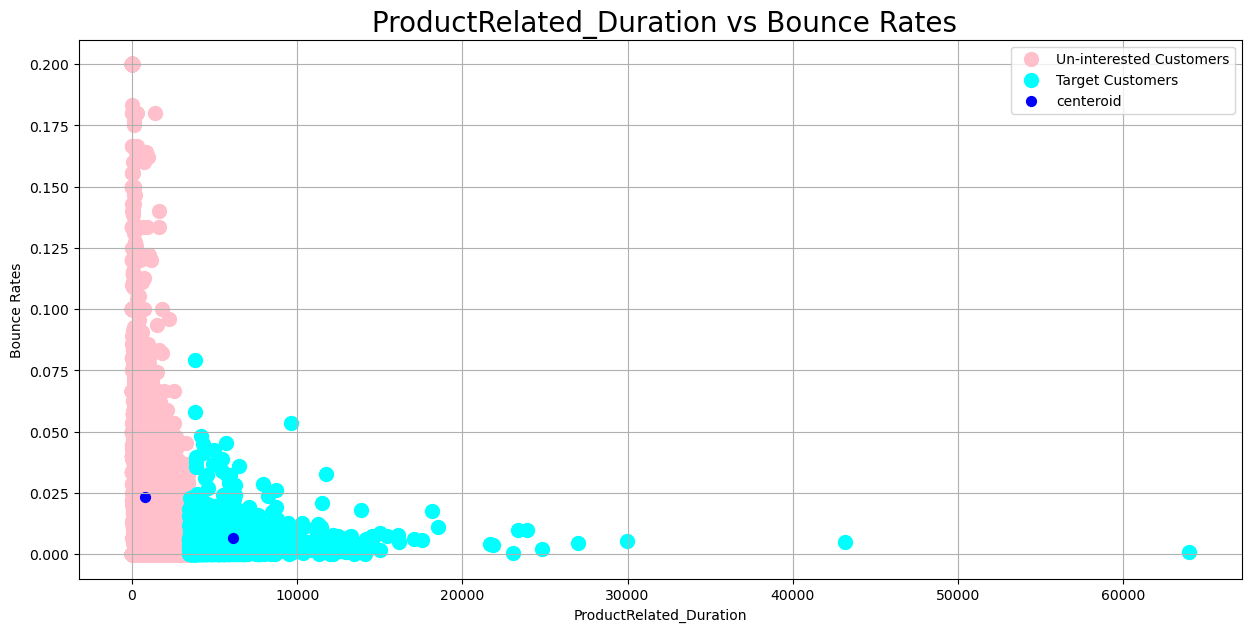

In [207]:
# Initialize the KMeans algorithm with parameters
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
# Fit the KMeans model and predict cluster labels
y_means = km.fit_predict(x)
# Scatter plot for different clusters
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'cyan', label = 'Target Customers')
# Plot the cluster centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title(' ProductRelated_Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('ProductRelated_Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()


#### Observations:
1. It can be infered that the customers who spent a longer Product Related duration in a website are very less likely to bounce from the website that is navigating away from the website just after navigating one page of that website. 

#### This oficillay ends EDA :)

## 7. Data Preprocessing

### 7.1 check for missing values:

In [3]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### Observations:
1. The dataset has absolutely no missing values.


### 7.2 Convert categorical features to numeric features using Label encoder

In [4]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['Month', 'VisitorType', 'Weekend', 'Revenue']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Convert categorical features to numeric labels
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [5]:
df

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay  Month  \
0         0.200000   0.200000    0.000000         0.0      2   
1         0.000000   0.100000    0.000000         0.0      2   
2         0.200000   0.200000    0.000000         0.0      2   
3         0.050000   0.140000    0.000000         0.0      2   
4         0.020000   0.050000    0.000000         0.0      2   
...            ...        ...         ...         ...    ...   
12325     0.007143   0.029031   12.241717         0.0      1   
12326     0.000000   0.021333    0.000000         0.0      7   
12327     0.083333   0.086667    0.000000         0.0      7   
12328     0.000000   0.021053    0.000000         0.0      7   
12329     0.000000   0.066667    0.000000         0.0      7   

       OperatingSystems  Browser  Region  TrafficType  VisitorType  Weekend  \
0                     1        1       1            1            2        0   
1                     2        2       1            2            2        0   
2                     4        1       9            3            2        0   
3                     3        2       2            4            2        0   
4                     3        3       1            4            2        1   
...                 ...      ...     ...          ...          ...      ...   
12325                 4        6       1            1            2        1   
12326                 3        2       1            8            2        1   
12327                 3        2       1           13            2        1   
12328                 2        2       3           11            2        0   
12329                 3        2       1            2            0        1   

       Revenue  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
12325        0  
12326        0  
12327        0  
12328        0  
12329        0  

[12330 rows x 18 columns]

## 8. Co-relation Analysis

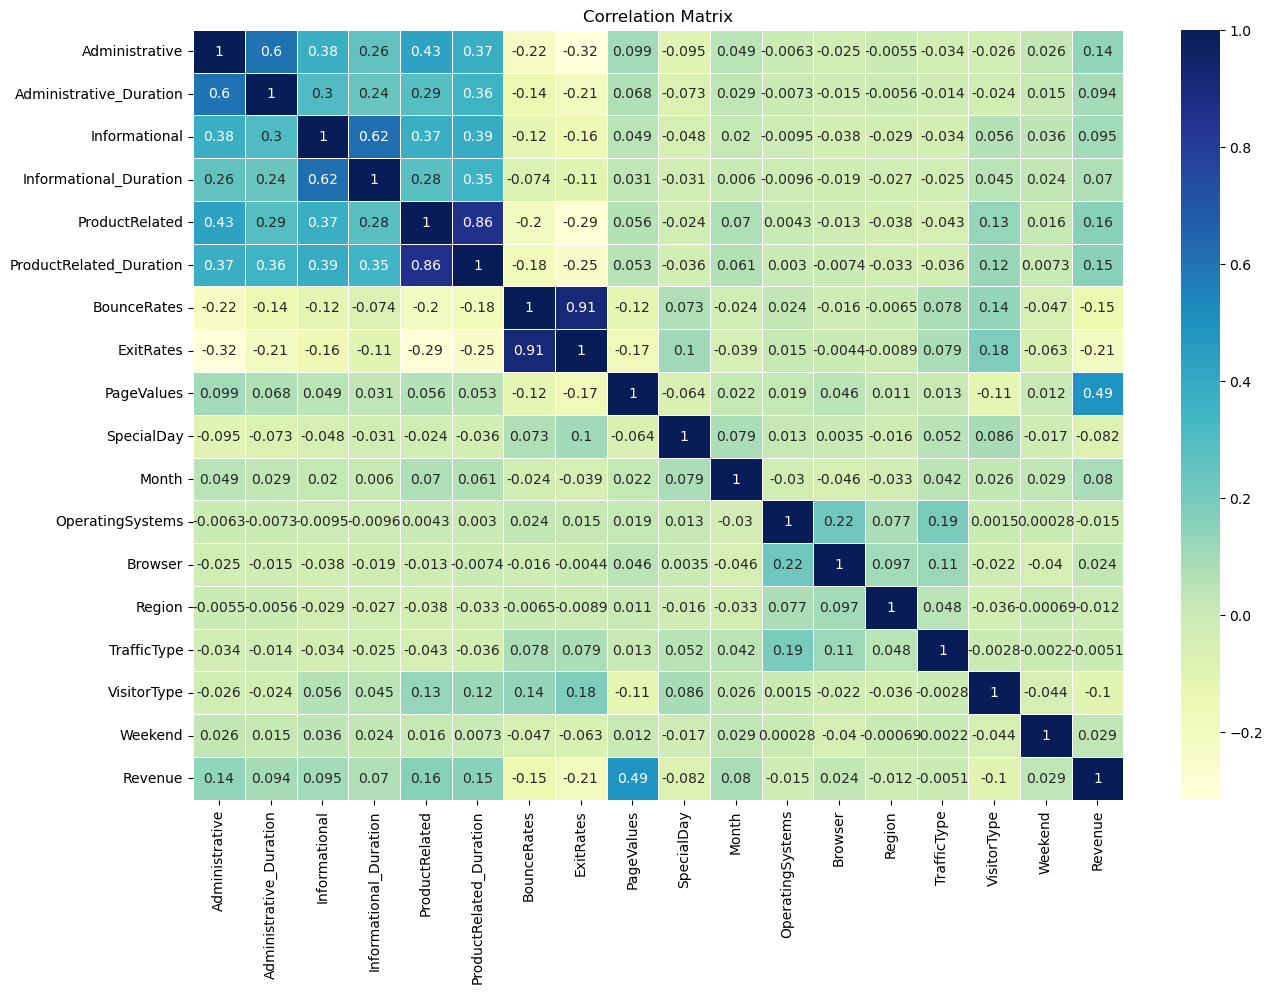

In [6]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [7]:
df.corr()[['Revenue']].sort_values(by='Revenue', ascending=False) 

Revenue
Revenue                  1.000000
PageValues               0.492569
ProductRelated           0.158538
ProductRelated_Duration  0.152373
Administrative           0.138917
Informational            0.095200
Administrative_Duration  0.093587
Month                    0.080150
Informational_Duration   0.070345
Weekend                  0.029295
Browser                  0.023984
TrafficType             -0.005113
Region                  -0.011595
OperatingSystems        -0.014668
SpecialDay              -0.082305
VisitorType             -0.104726
BounceRates             -0.150673
ExitRates               -0.207071

#### Observations:
1. The heatmap represents weak to moderate corelation of features with respect to target variable(Revenue).
2. The features 'PageValues', 'ProductRelated', 'ProductRelated_Duration' reprsent positive corelation with respect to Revenue.
3. The features "ExitRates', 'BounceRates' and 'visitorType' represent negative corelation with respect to Revenue.
4. The features 'browser', 'Weekend' and 'Informational_Duration' and almost no corelation with respect to target variable.

## 9. Data Analysis:

### 9.1 Seperating Target column

In [8]:
# Splitting dependent and independent variables(columns)
y = df['Revenue']
x = df.drop(['Revenue'], axis = 1)

### 9.2 SMOTE (Synthetic Minority Over-sampling Technique) Analysis

In [9]:
from imblearn.over_sampling import SMOTE
# Initialize the SMOTE object with a specified random state
smote = SMOTE(random_state=42)
# Apply the SMOTE oversampling to your feature matrix 'x' and target vector 'y'
x, y = smote.fit_resample(x, y)

## 10. Data Modelling

Models used for analysis are: 
1. Decision Tree classifier
2. Ada boost classifier
3. Random forest classifier
4. XG Boost classifier
5. GBT classifier

The models are initially trained with all the input features.

### 10.1 Prediction on validation set + classification report

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

class ClassifierTrainer:
    def __init__(self, X_train, X_val, X_test, y_train, y_val, y_test):
        self.X_train = X_train
        self.X_val = X_val
        self.X_test = X_test
        self.y_train = y_train
        self.y_val = y_val
        self.y_test = y_test
        
    def train(self, model):
        model.fit(self.X_train, self.y_train)
        
    def predict(self, model, X_data):
        return model.predict(X_data)
    
    def evaluate(self, model, X_data, y_data):
        predictions = self.predict(model, X_data)
        accuracy = accuracy_score(y_data, predictions)
        return accuracy

# Step 1: Split the data 
X_train, X_valtest, y_train, y_valtest = train_test_split(x, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=42)

# Step 2: Create an instance of the ClassifierTrainer class
trainer = ClassifierTrainer(X_train, X_val, X_test, y_train, y_val, y_test)

# Step 3: Instantiate and train the models
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
gbt_classifier = GradientBoostingClassifier(random_state=42)
ada_classifier = AdaBoostClassifier(random_state=42)
lgbm_classifier = LGBMClassifier(random_state=42)
catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)

trainer.train(dt_classifier)
trainer.train(rf_classifier)
trainer.train(xgb_classifier)
trainer.train(gbt_classifier)
trainer.train(ada_classifier)
trainer.train(lgbm_classifier)
trainer.train(catboost_classifier)


# Step 4: Evaluate models on validation set
models = [dt_classifier, rf_classifier, xgb_classifier, gbt_classifier, ada_classifier, lgbm_classifier, catboost_classifier]
for model in models:
    val_predictions = trainer.predict(model, trainer.X_val)
    val_accuracy = trainer.evaluate(model, trainer.X_val, trainer.y_val)
    val_classification_report = classification_report(trainer.y_val, val_predictions)
    
    print(f"{model.__class__.__name__} - Validation Results:")
    print(f"Accuracy: {val_accuracy:.4f}")
    print(f"{model.__class__.__name__} - Validation Classification Report:")
    print(val_classification_report)


[LightGBM] [Info] Number of positive: 6257, number of negative: 6249
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2146
[LightGBM] [Info] Number of data points in the train set: 12506, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500320 -> initscore=0.001279
[LightGBM] [Info] Start training from score 0.001279
DecisionTreeClassifier - Validation Results:
Accuracy: 0.8822
DecisionTreeClassifier - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2077
           1       0.88      0.89      0.88      2092

    accuracy                           0.88      4169
   macro avg       0.88      0.88      0.88      4169
weighted avg       0.88      0.88      0.88      4

#### Observations:
1. Out of all the classifiers, Random Forest, XG boost and lightGBM performed well with an accuracy of 92% on the validation set.
2. Decision Tree had the least performance with an accuracy of 88% followed by Ada boost with accuracy of 89%.

|      Classifier       |    Accuracy    |
|-----------------------|----------------|
|DecisionTreeClassifier |    0.8822      |
|RandomForestClassifier |    0.9220      |
|  XGBClassifier        |    0.9249      |
|  AdaBoostClassifier   |    0.8976      |
|  GradientBoosting     |    0.9081      |
|  LGBMClassifier       |    0.9211      |
| CatBoostClassifier    |    0.9199      |


### 10.2 Confusion Matrix for all the above models

DecisionTreeClassifier - Validation Confusion Matrix:
[[1819  258]
 [ 233 1859]]


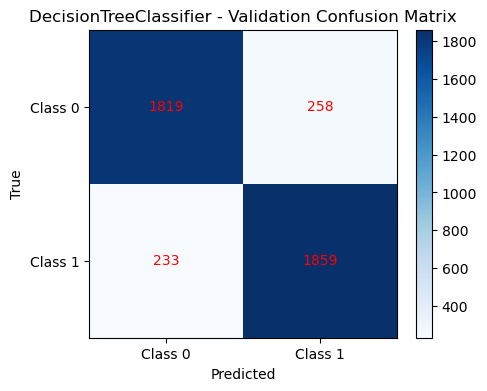

RandomForestClassifier - Validation Confusion Matrix:
[[1883  194]
 [ 131 1961]]


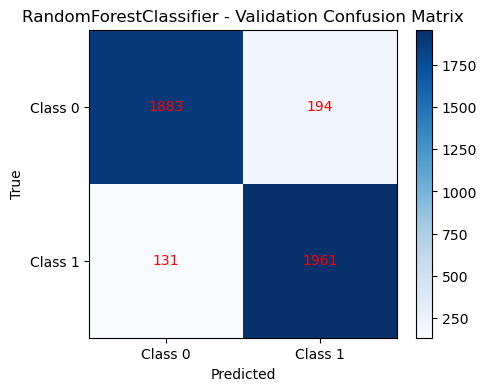

XGBClassifier - Validation Confusion Matrix:
[[1899  178]
 [ 135 1957]]


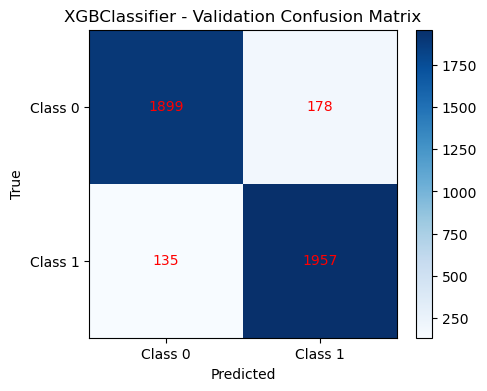

GradientBoostingClassifier - Validation Confusion Matrix:
[[1873  204]
 [ 179 1913]]


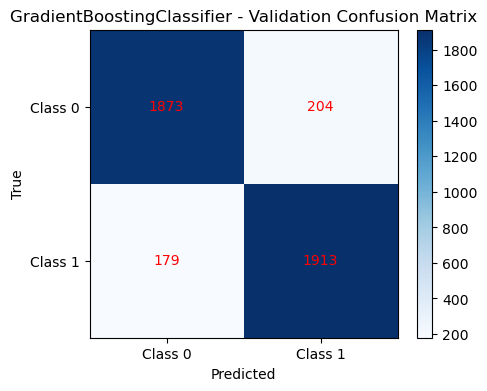

AdaBoostClassifier - Validation Confusion Matrix:
[[1846  231]
 [ 196 1896]]


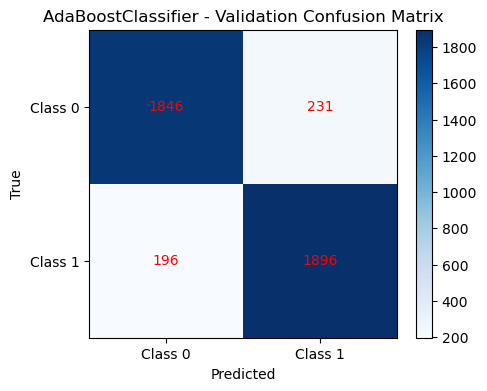

LGBMClassifier - Validation Confusion Matrix:
[[1889  188]
 [ 141 1951]]


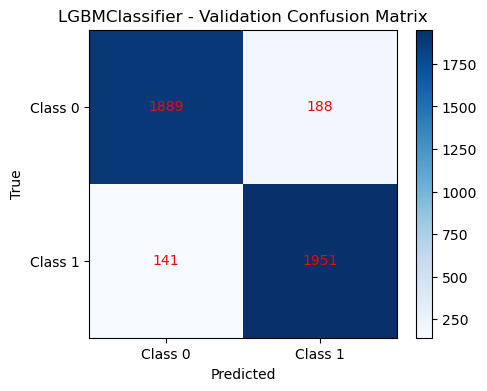

CatBoostClassifier - Validation Confusion Matrix:
[[1888  189]
 [ 145 1947]]


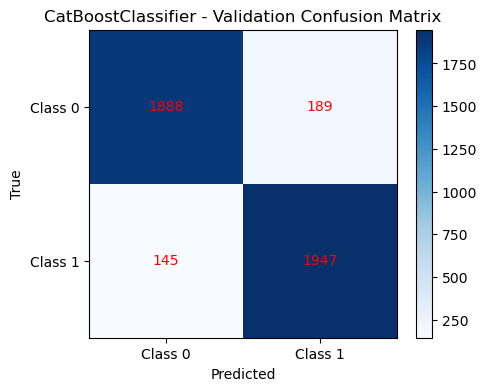

In [45]:
models = [dt_classifier, rf_classifier, xgb_classifier, gbt_classifier, ada_classifier, lgbm_classifier, catboost_classifier]
# Loop through each model and visualize the confusion matrix
for model in models:
    val_predictions = trainer.predict(model, trainer.X_val)
    val_confusion_matrix = confusion_matrix(trainer.y_val, val_predictions)
    
    print(f"{model.__class__.__name__} - Validation Confusion Matrix:")
    print(val_confusion_matrix)
    
    # Visualize confusion matrix using matplotlib
    plt.figure(figsize=(5, 4))
    plt.imshow(val_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{model.__class__.__name__} - Validation Confusion Matrix")
    plt.colorbar()
    
    classes = ["Class 0", "Class 1"]
    tick_marks = np.arange(len(classes))
    
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, val_confusion_matrix[i, j], ha='center', va='center', color='red')
    
    plt.show()

#### Observations:

Predicted True positive values of the above classifiers 
1. DecisionTreeClassifier - 1859
2. RandomForestClassifier -1961
3. XGBClassifier- 1957
4. GradientBoostingClassifier- 1913
5. AdaBoostClassifier-1896
6. Light GBM- 1951
7. Catboostclassifier- 1947

It can be observed that Random Forest classifier has predicted highest true positive values followed by XGB classifier.

### 10.3 Feature importance for all the above models

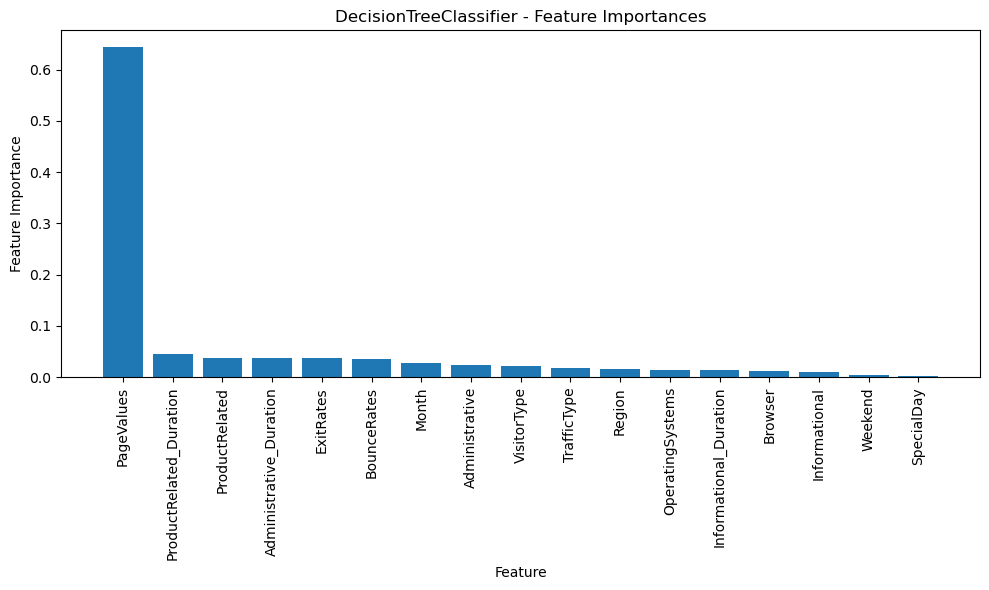

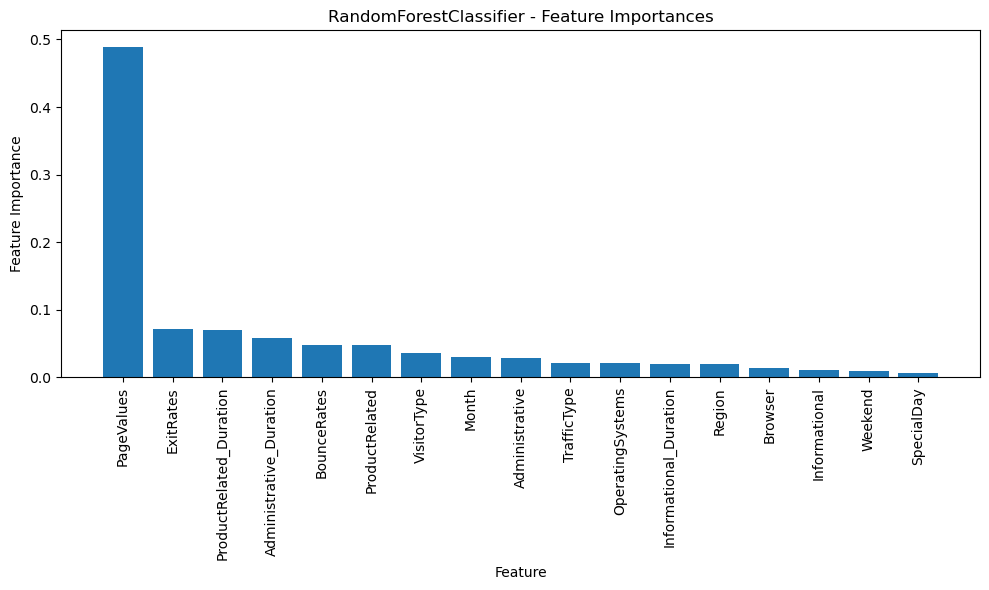

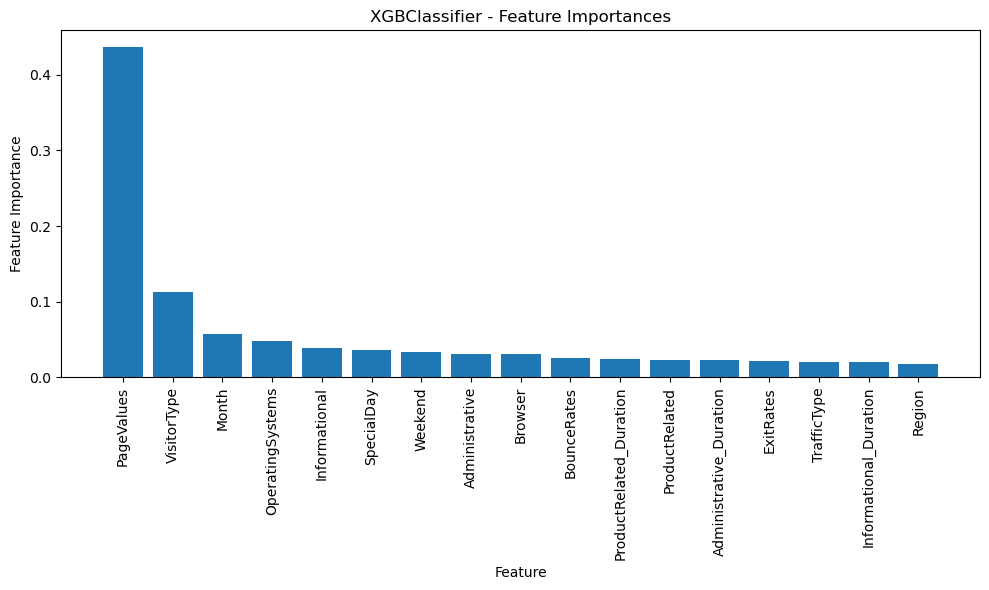

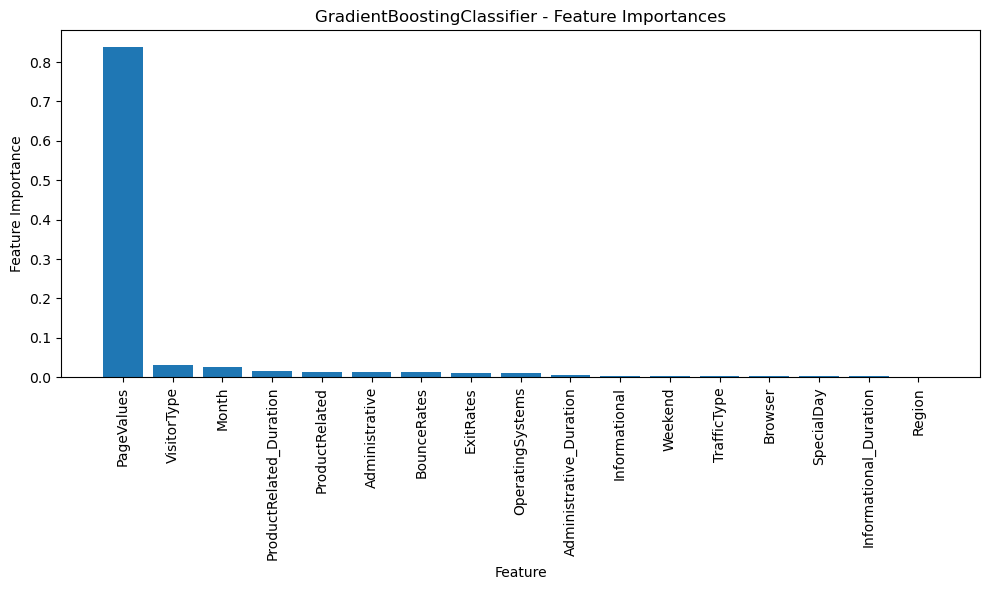

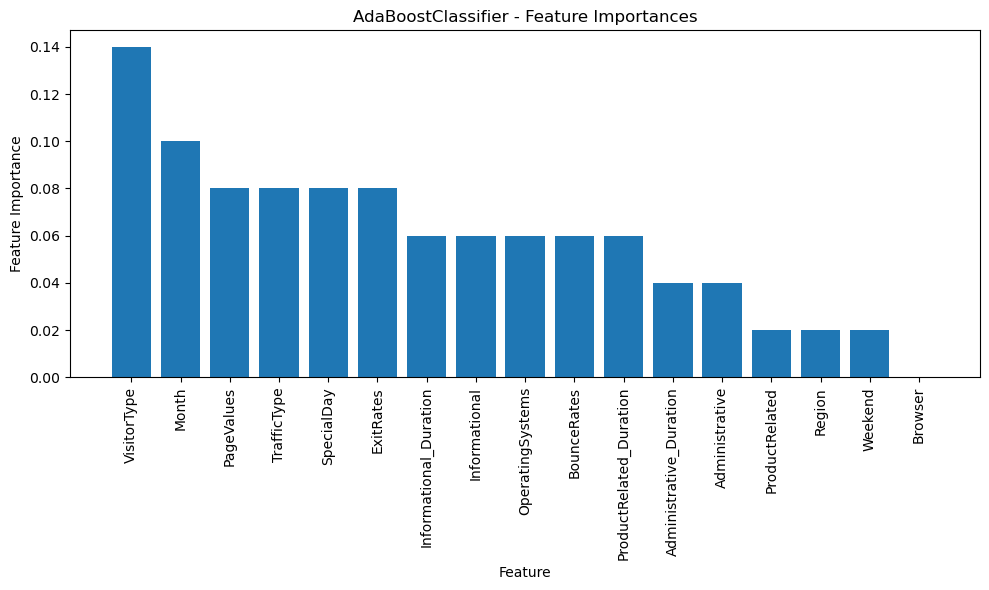

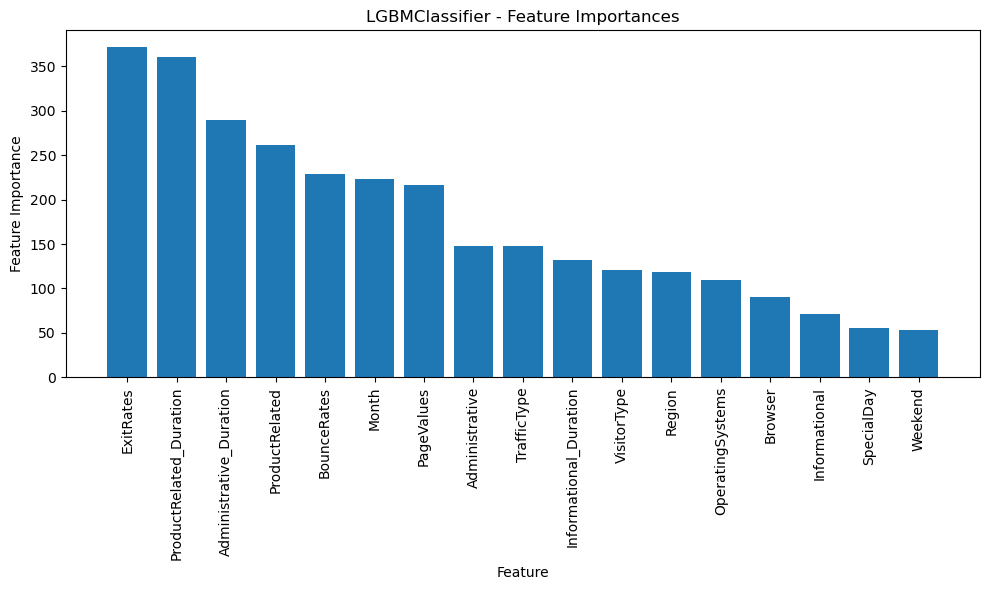

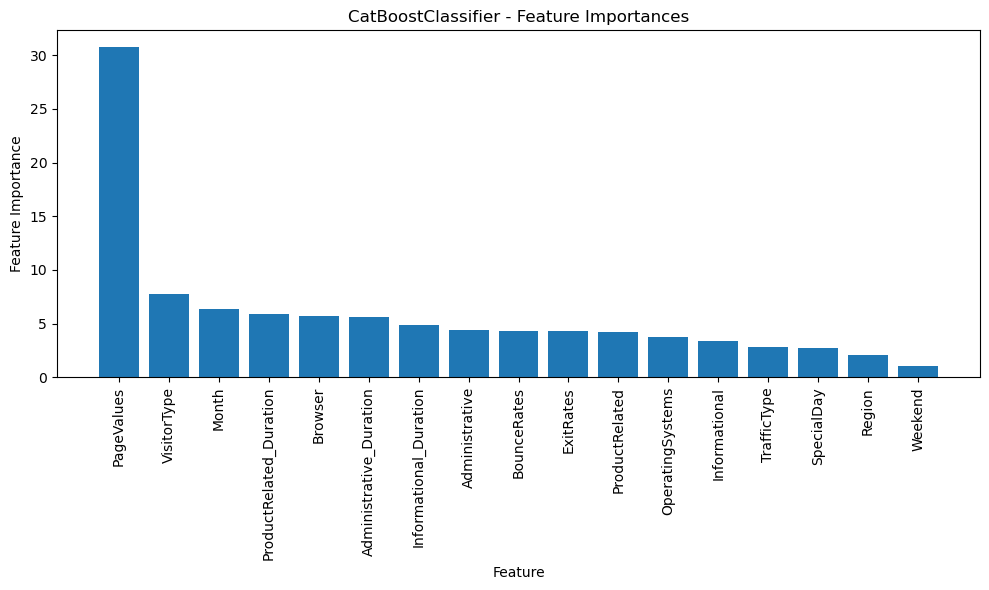

In [46]:
for model in models:
    plt.figure(figsize=(10, 6))
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        # Get feature names from your input data 
        feature_names = list(X_train.columns) if isinstance(X_train, pd.DataFrame) else range(len(importances))
        
        plt.bar(range(len(importances)), importances[indices])
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation='vertical')
        plt.xlabel('Feature')
        plt.ylabel('Feature Importance')
        plt.title(f"{model.__class__.__name__} - Feature Importances")
        plt.tight_layout()  # Ensures x-axis labels are not cut off
        plt.show()
    else:
        print(f"{model.__class__.__name__} does not have feature importances.")




#### Observations:

1. The above plot represents feature importances using all the above models. All the models have there own important features.

### 10.4 Prediction on Test Data

We intend to make our final predictions on test data using the top 3 models which performed better on validation set.

Models used for prediction on test data:
1. Random Forest
2. XG Boost
3. Light GBM

In [47]:
# Train Random Forest, XGBoost, and LightGBM classifiers
trainer.train(rf_classifier)
trainer.train(xgb_classifier)
trainer.train(lgbm_classifier)

# Create a list of models for prediction
prediction_models = [rf_classifier, xgb_classifier, lgbm_classifier]

# Perform predictions on test data
for model in prediction_models:
    test_predictions = trainer.predict(model, trainer.X_test)
    test_accuracy = trainer.evaluate(model, trainer.X_test, trainer.y_test)
    test_classification_report = classification_report(trainer.y_test, test_predictions)
    
    print(f"{model.__class__.__name__} - Test Results:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"{model.__class__.__name__} - Test Classification Report:")
    print(test_classification_report)


[LightGBM] [Info] Number of positive: 6257, number of negative: 6249
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2146
[LightGBM] [Info] Number of data points in the train set: 12506, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500320 -> initscore=0.001279
[LightGBM] [Info] Start training from score 0.001279
RandomForestClassifier - Test Results:
Accuracy: 0.9283
RandomForestClassifier - Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      2096
           1       0.91      0.95      0.93      2073

    accuracy                           0.93      4169
   macro avg       0.93      0.93      0.93      4169
weighted avg       0.93      0.93      0.93      4169

XGBClas

#### Observations:
1. All the three models performed good on test data with same amount of accuracy i.e 92%.

### 10.5 Confusion matrix of test data

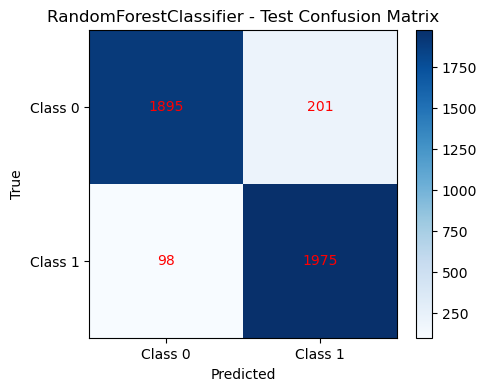

RandomForestClassifier - Test Results:
Accuracy: 0.9283


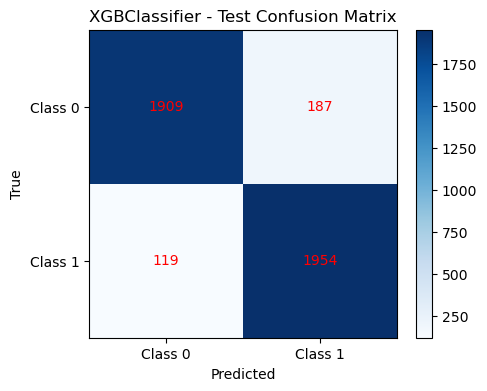

XGBClassifier - Test Results:
Accuracy: 0.9266


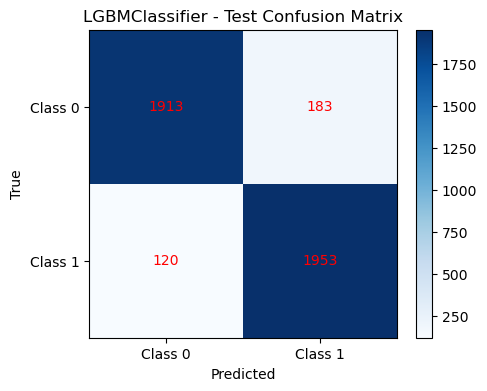

LGBMClassifier - Test Results:
Accuracy: 0.9273


In [50]:
for model in prediction_models:
    test_predictions = trainer.predict(model, trainer.X_test)
    
    # Calculate confusion matrix
    test_confusion_matrix = confusion_matrix(trainer.y_test, test_predictions)
    
    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    plt.imshow(test_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{model.__class__.__name__} - Test Confusion Matrix")
    plt.colorbar()
    
    classes = ["Class 0", "Class 1"]
    tick_marks = np.arange(len(classes))
    
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, test_confusion_matrix[i, j], ha='center', va='center', color='red')
    
    plt.show()
    
    test_accuracy = trainer.evaluate(model, trainer.X_test, trainer.y_test)
    print(f"{model.__class__.__name__} - Test Results:")
    print(f"Accuracy: {test_accuracy:.4f}")

### Observations:
1. Random forest turns out to be the best classifier as it was successfully able to classify the maximum number of samples as True positives.

### 10.6 ROC curve for the above models

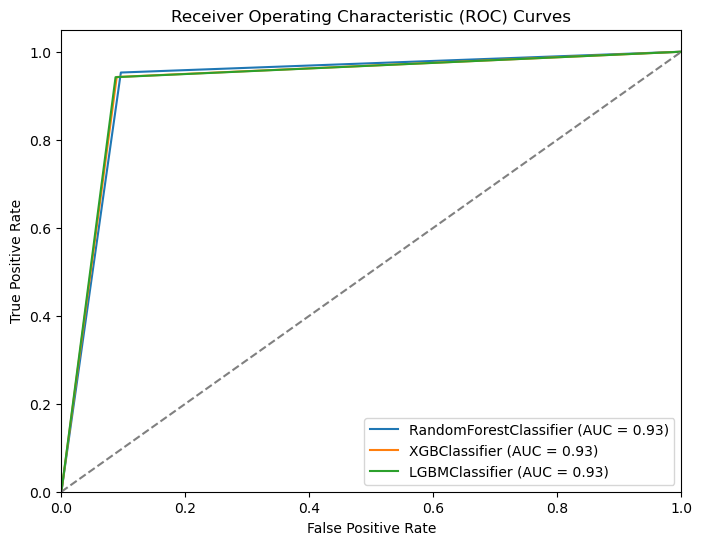

In [52]:
from sklearn.metrics import roc_curve, auc
# Perform predictions on test data and plot ROC curves
plt.figure(figsize=(8, 6))
for model in prediction_models:
    test_predictions = trainer.predict(model, trainer.X_test)
    fpr, tpr, _ = roc_curve(trainer.y_test, test_predictions)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

#### Observations:

AUC of 0.93 indicates that the classification model is performing very well in distinguishing between the positive and negative classes. 

## 11. Results/Conclusion

#### Insights from EDA:
1. The dataset had class imbalance for target variable "Revenue".
2. The dataset had outliers for certain columns.
3. From cluster analysis it can be observed that the users whose duration is less on the weppage are more likely to bounce. This information can be useful for companies to plan customer retention startegies.

#### Insights from Data Modelling:
1. A bunch of classifiers were trained on validation set and top 3 classifiers(Random Forest, Light GBM, XG boost) were used to predict on test data. 
2. And, it can be observed that all the 3 classifiers have an accuracy of 92% on test data. But, when we look at confusion matrix it can be observed that the random forest is considered best classifier as it able classify more samples as True positives.
3. The class imbalance issue was succesfully addressed.
4. AUC of 0.93 has been achieved which indicates that the model is performing very well in distinguishing between the positive and negative classes.

#### Future Work:
1. The results can be further optimized using Hyper parameter tuning on the best models.

## 12. References 

1. Almokainzi, A.(2020, December 3). Online Shoppers Purchasing Intention. Medium. https://medium.com/analytics-vidhya/online-shoppers-purchasing-intention-c757e4ff6bbe
2. Al Mamun, .Abdullah(2021). Final Project . Kaggle. https://www.kaggle.com/code/mamun18/final-project-online-shoppers-intention
3. Shin, T.(2020, January 11).An Extensive Step by Step Guide to Exploratory Data Analysis. Medium.https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e
4. Seshapanpu, J. (2019).A Simple Tutorial on Exploratory Data Analysis. Kaggle. https://www.kaggle.com/code/mamun18/final-project-online-shoppers-intention